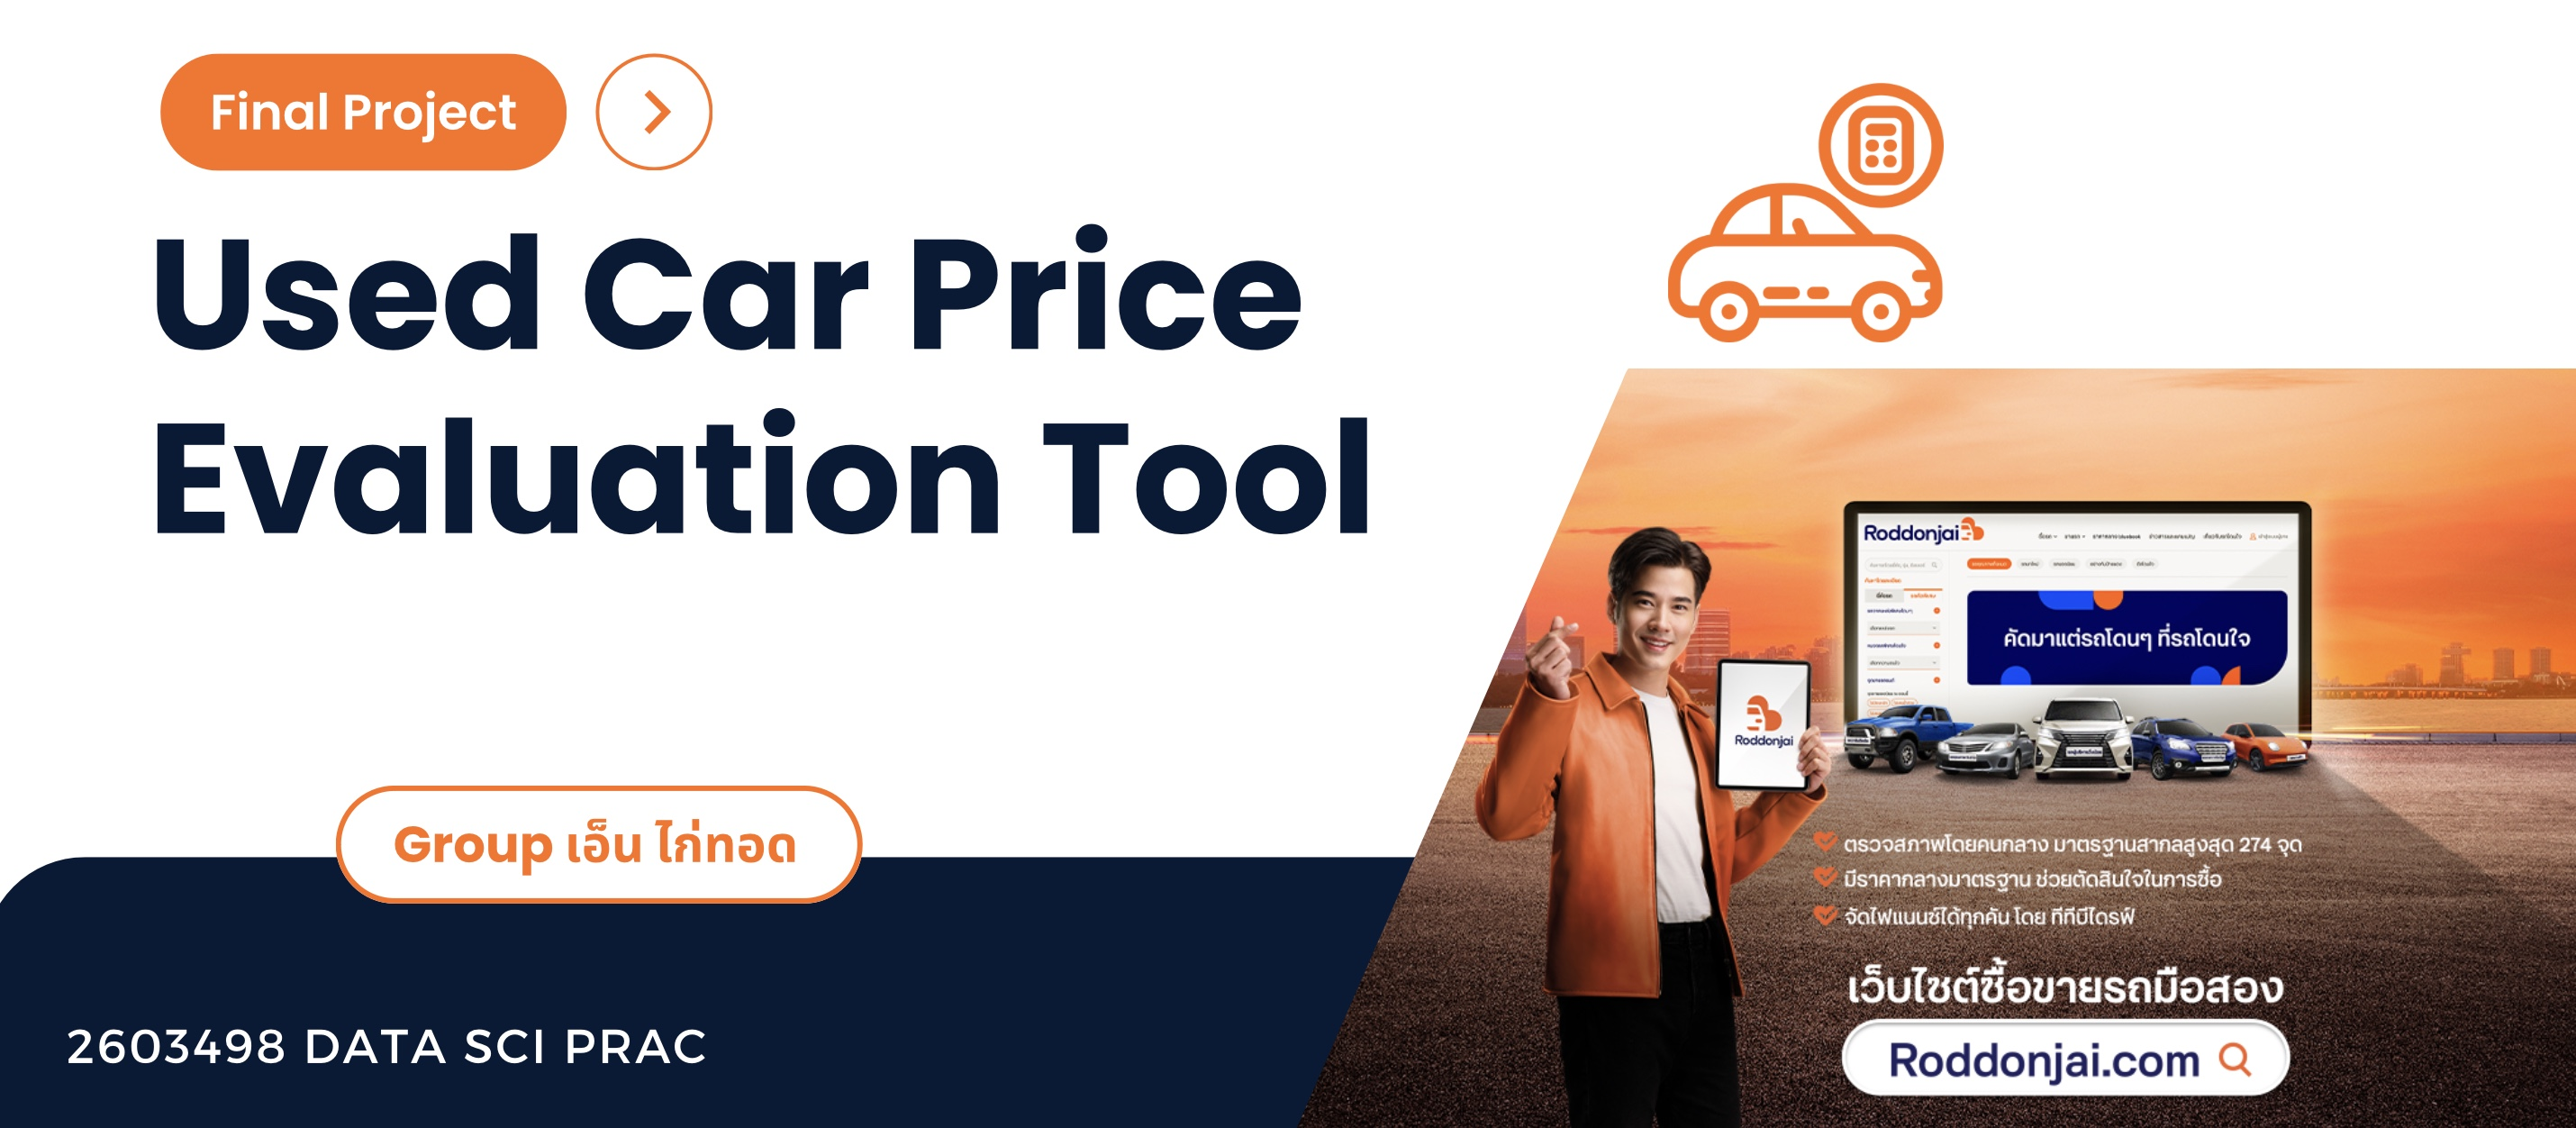

**Group Member:**

6542010226	กิรณา เลิศรัตน์

6542029226	ฐาณิตา นุชนนทรี

6542036626	ณัฐธีรา เจี้ยนติ้ว

6542080126	พัทธนันท์ เฮงจิตตระกูล

6542117826	สรวิชญ์ โชติวัตธนาพงษ์

6542118426	สรวิชญ์ หวง

# ***Group N : Used Car Price Evaluation Tool***

# **Content Summary**
0. Introduction, Problem Statement and Business Goals

1. Data Wrangling

2. Exploratory Data Analysis :Trend, Trait and distribution across all features

> **insights** : Most cars are priced under 500,000, with very few cars in higher price ranges, indicating the data is concentrated in the lower price ranges.

> **insights** : Older cars, especially SUVs, PPVs, and luxury models, show a significant drop in price. Meanwhile, older economy brands experience a more gradual decrease in price.


3. Data Preprocessing and Feature Engineering Techniques:  

4. Model Selection on Appropriate Algorithms : SVR, Random Forest, XGBoost, CatBoost

5. Compare Improved Performance Between 3 Approaches with Pipelines.

6. Key Evaluation Matrices : **Why we consider MAPE?**

7. Model Summary : Evaluation of All Approaches.
Interpretation Summary by 3 Approaches (Based on Train and Test Set Performance)

8. Final Model Conclusion


9. Model Explainability : Feature Importance Analysis

10. Further Recommendations for Enhancing Model Accuracy and Usability


***

# **Introduction**

> Used Car Price Evaluation is a key application of AI in the automotive and resale industry. It involves predicting a fair market price for second-hand vehicles based on factors like brand, model, age and mileage. This project demonstrates how a structured data science workflow can enhance pricing accuracy, support informed decision-making, and build trust among buyers and sellers in the used car market.



# **Problem Statement and Business Goals**

1. **Information Imbalance** – Buyers and sellers often lack equal access to vehicle data, leading to unfair pricing.

2. **Complex Pricing Factors** – Sellers struggle to set fair prices due to many variables like age, mileage, and brand.

3. **Market Volatility** – Rapid changes in trends and economy make manual pricing unreliable without modern tools.

> **Proposed Solution: Regression Model for Used Car Pricing**

We propose building a **regression model** to predict used car prices on RODDONJAI,

 The model is trained on secondary data collected through web scraping from the Roddonjai website in 2025, ensuring real-world relevance for accurate price estimation.

> **Objective of the Car Price Evaluation Tool**

**Sellers** : can confidently set car prices aligned with their personal goals and current market standards.

**Buyers** : can easily compare the prices of cars they are interested in with standard valuations, helping them make more informed purchasing decisions.

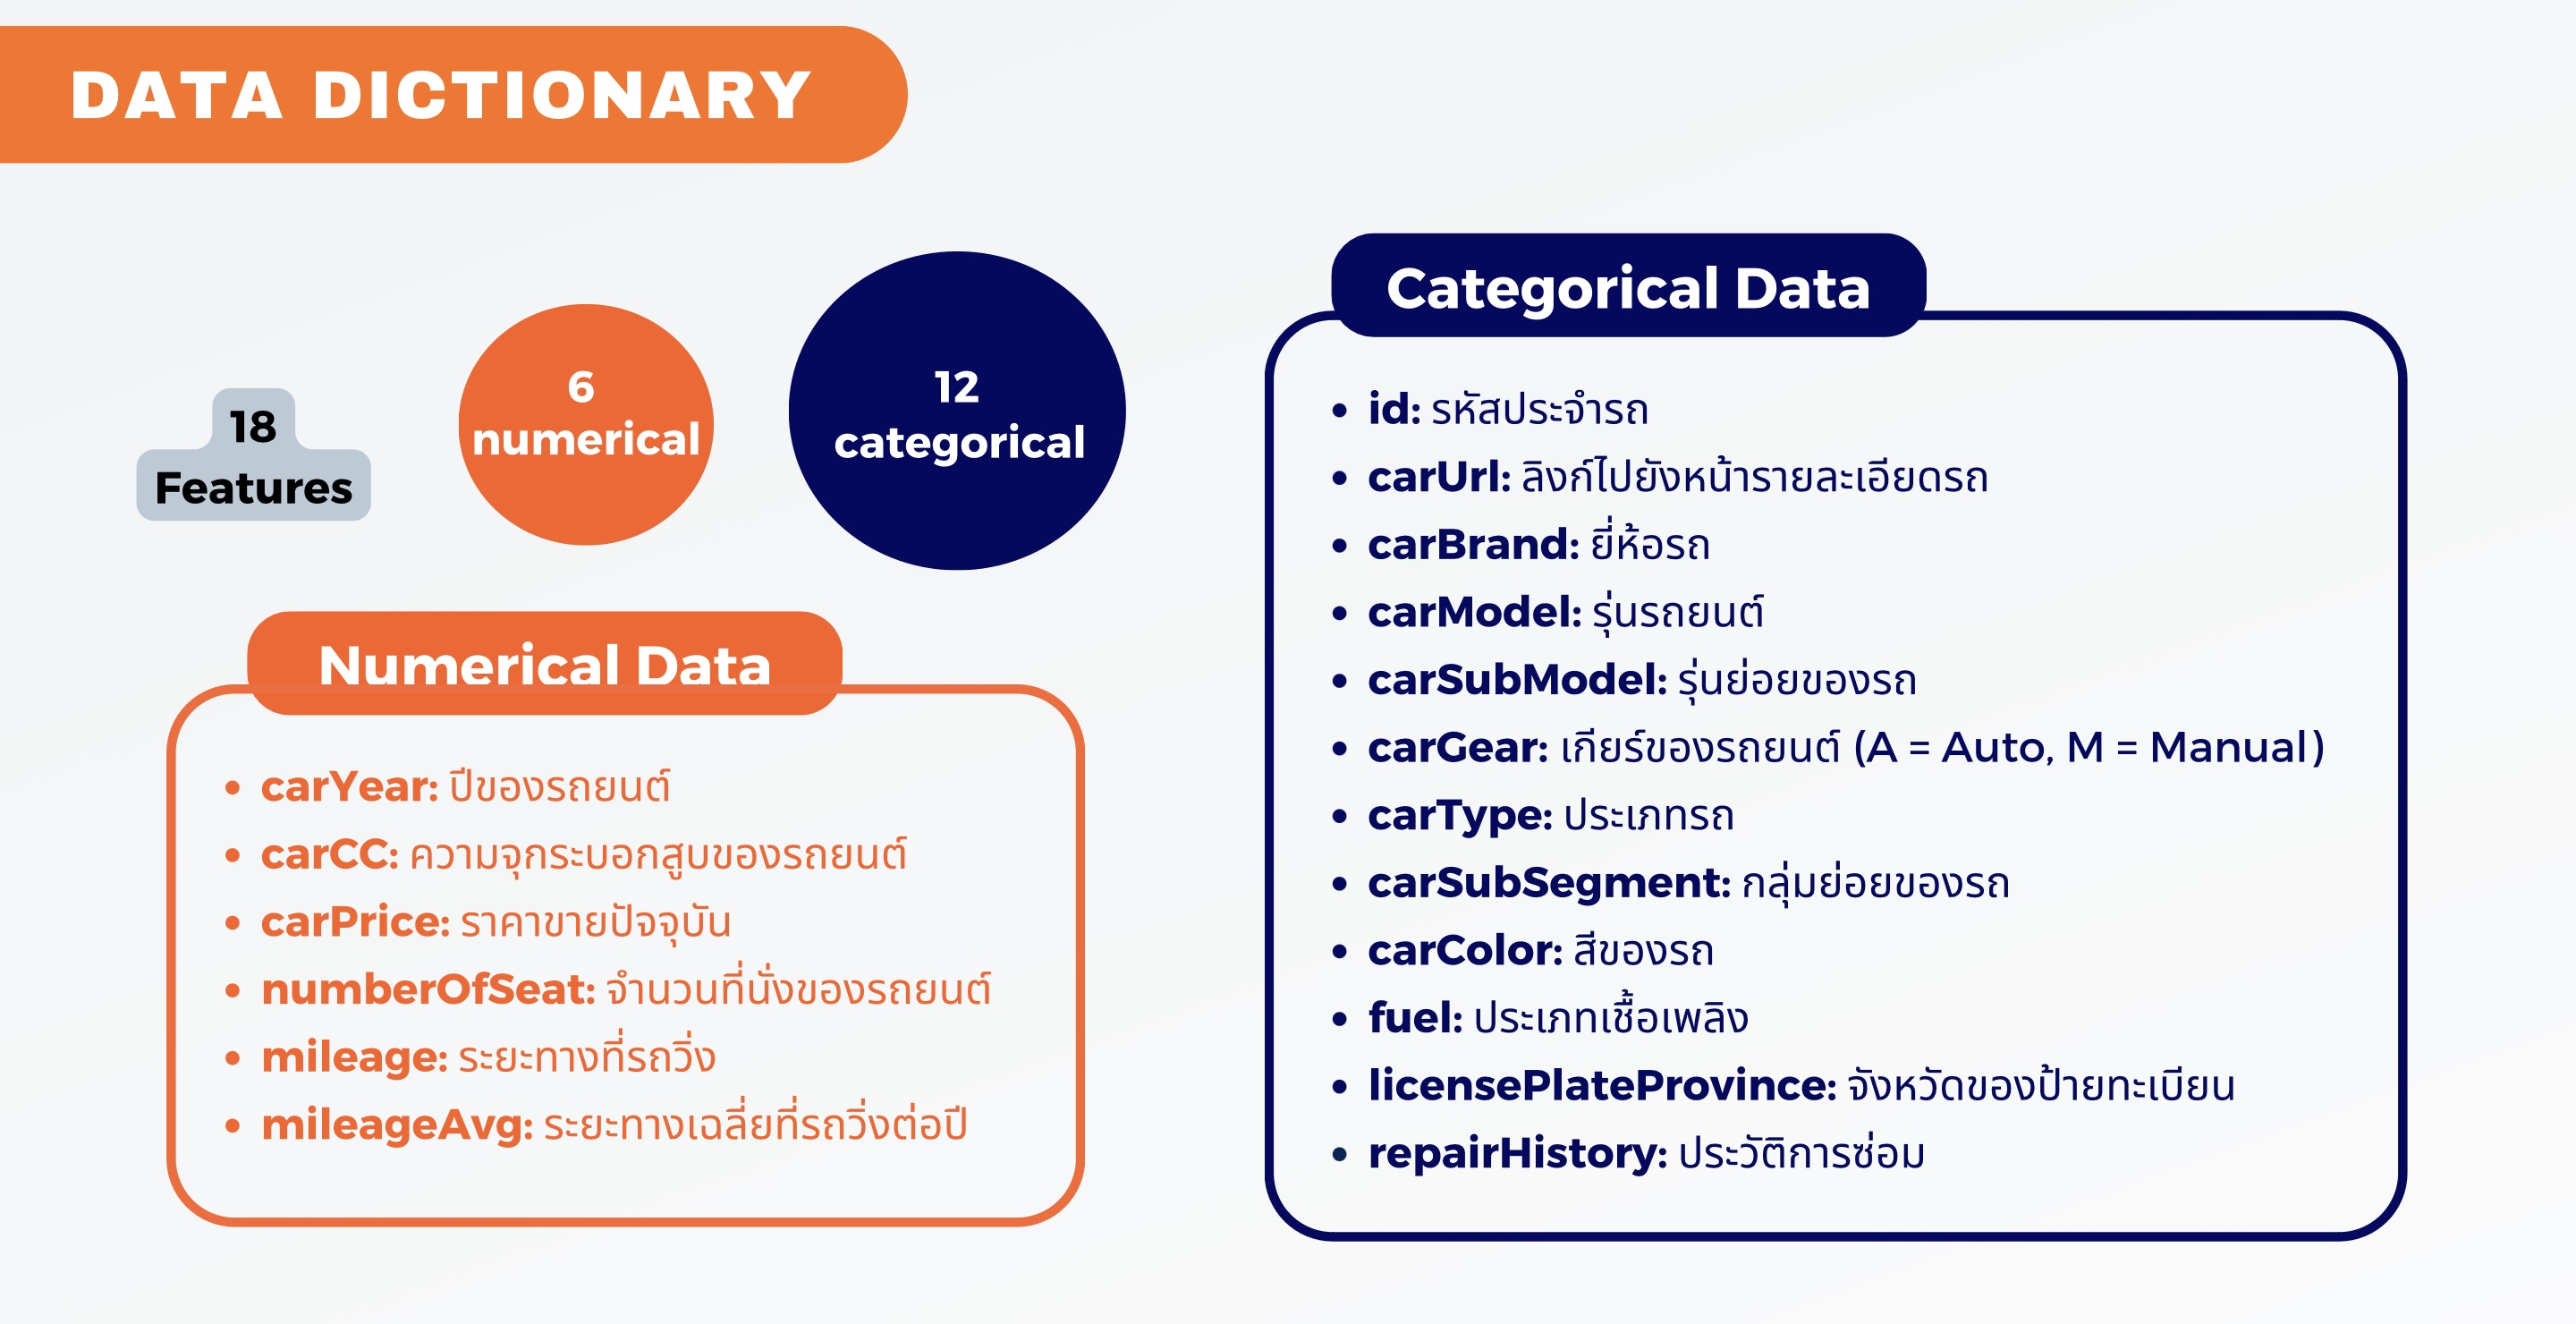

# Import Dataset and Libralies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
sns.set(style='whitegrid')

Only paste the dataset path 'Roddonjai_2025_rawdata.csv' here  

In [2]:
file_path = '/content/Roddonjai_2025_rawdata.csv' # only paste the dataset path 'Roddonjai_2025_rawdata.csv' here

In [6]:
data= pd.read_csv(file_path)

In [7]:
data

,id,carUrl,carBrand,carModel,carSubModel,carType,carSubSegment,carYear,carCC,carGear,carColor,carPrice,mileage,fuel,numberOfSeat,licensePlateProvince,repairHistory,mileageAvg
0,CAR202508280129,https://www.roddonjai.com/service/car-detail/C...,Toyota,Hilux Revo,Hilux Revo 2.8 J Plus Single Cab (MY18),Pick up,Single Cab,2021,2800,M,เทา,395000,99078,Diesel,2,กรุงเทพมหานคร,NaN,"เฉลี่ย 24,770 กม./ปี"
1,CAR202510140010,https://www.roddonjai.com/service/car-detail/C...,Toyota,Hilux Revo,Hilux Revo Smart Cab 2.4 Entry Z Edition (MY20),Pick up,Space Cab,2023,2400,M,ขาว,429000,46116,Diesel,2,กรุงเทพมหานคร,NaN,"เฉลี่ย 23,058 กม./ปี"
2,CAR202510080008,https://www.roddonjai.com/service/car-detail/C...,Isuzu,D-Max All New Blue Power,D-Max All New Blue Power Cab-4 Hi-Lander 1.9 D...,Pick up,Double Cab,2021,1900,M,สีเทา,629000,34428,Diesel,5,ชลบุรี,NaN,"เฉลี่ย 8,607 กม./ปี"
3,CAR202510300253,https://www.roddonjai.com/service/car-detail/C...,Toyota,Hilux Revo,Hilux Revo Double Cab 2.4 E Plus Prerunner (MNC),Pick up,Double Cab,2019,2400,A,สีเทา,529200,115311,Diesel,5,กรุงเทพมหานคร,ไม่เคย,"เฉลี่ย 19,219 กม./ปี"
4,CAR202510130014,https://www.roddonjai.com/service/car-detail/C...,Toyota,Hilux Revo,Hilux Revo 2.4 J Single Cab,Pick up,Single Cab,2020,2400,M,สีขาว,339000,160327,Diesel,2,กรุงเทพมหานคร,NaN,"เฉลี่ย 32,065 กม./ปี"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,CAR202510160006,https://www.roddonjai.com/service/car-detail/C...,Hyundai,H-1,H-1 2.5 Elite+ (MNC),Van,Luxury,2018,2500,A,ดำ,910000,330079,Diesel,11,กรุงเทพมหานคร,NaN,"เฉลี่ย 47,154 กม./ปี"
10825,CAR202507050012,https://www.roddonjai.com/service/car-detail/C...,Toyota,Hilux Revo,Hilux Revo 2.8 J Plus Single Cab (MY18),Pick up,Single Cab,2021,2800,M,สีขาว,505000,110405,Diesel,2,สกลนคร,NaN,"เฉลี่ย 27,601 กม./ปี"
10826,CAR202506080169,https://www.roddonjai.com/service/car-detail/C...,Nissan,NP300 Navara,NP300 Navara King Cab 2.5 EL Calibre,Pick up,Space Cab,2019,2500,M,สีดำ,448000,84975,Diesel,2,ชัยภูมิ,NaN,"เฉลี่ย 14,163 กม./ปี"
10827,CAR202512140015,https://www.roddonjai.com/service/car-detail/C...,Toyota,Hilux Revo,Hilux Revo 2.4 Entry Z Edition Single Cab (MY22),Pick up,Single Cab,2024,2400,M,สีขาว,519000,50396,Diesel,2,อุบลราชธานี,NaN,"เฉลี่ย 50,396 กม./ปี"


# **Data Wrangling**


## 1) Explore the data

In [8]:
data.head()

,id,carUrl,carBrand,carModel,carSubModel,carType,carSubSegment,carYear,carCC,carGear,carColor,carPrice,mileage,fuel,numberOfSeat,licensePlateProvince,repairHistory,mileageAvg
0,CAR202508280129,https://www.roddonjai.com/service/car-detail/C...,Toyota,Hilux Revo,Hilux Revo 2.8 J Plus Single Cab (MY18),Pick up,Single Cab,2021,2800,M,เทา,395000,99078,Diesel,2,กรุงเทพมหานคร,NaN,"เฉลี่ย 24,770 กม./ปี"
1,CAR202510140010,https://www.roddonjai.com/service/car-detail/C...,Toyota,Hilux Revo,Hilux Revo Smart Cab 2.4 Entry Z Edition (MY20),Pick up,Space Cab,2023,2400,M,ขาว,429000,46116,Diesel,2,กรุงเทพมหานคร,NaN,"เฉลี่ย 23,058 กม./ปี"
2,CAR202510080008,https://www.roddonjai.com/service/car-detail/C...,Isuzu,D-Max All New Blue Power,D-Max All New Blue Power Cab-4 Hi-Lander 1.9 D...,Pick up,Double Cab,2021,1900,M,สีเทา,629000,34428,Diesel,5,ชลบุรี,NaN,"เฉลี่ย 8,607 กม./ปี"
3,CAR202510300253,https://www.roddonjai.com/service/car-detail/C...,Toyota,Hilux Revo,Hilux Revo Double Cab 2.4 E Plus Prerunner (MNC),Pick up,Double Cab,2019,2400,A,สีเทา,529200,115311,Diesel,5,กรุงเทพมหานคร,ไม่เคย,"เฉลี่ย 19,219 กม./ปี"
4,CAR202510130014,https://www.roddonjai.com/service/car-detail/C...,Toyota,Hilux Revo,Hilux Revo 2.4 J Single Cab,Pick up,Single Cab,2020,2400,M,สีขาว,339000,160327,Diesel,2,กรุงเทพมหานคร,NaN,"เฉลี่ย 32,065 กม./ปี"


**Interpretation :**

> As **id** and **CarUrl**does not contribute to predictive modeling or insights.


> We decided to drop **CarUrl** from the data and use **id** as the unique identifier

In [9]:
data = data.drop('carUrl', axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    10829 non-null  object
 1   carBrand              10829 non-null  object
 2   carModel              10829 non-null  object
 3   carSubModel           10829 non-null  object
 4   carType               10829 non-null  object
 5   carSubSegment         10829 non-null  object
 6   carYear               10829 non-null  int64 
 7   carCC                 10829 non-null  int64 
 8   carGear               10829 non-null  object
 9   carColor              10829 non-null  object
 10  carPrice              10829 non-null  int64 
 11  mileage               10829 non-null  int64 
 12  fuel                  10812 non-null  object
 13  numberOfSeat          10829 non-null  int64 
 14  licensePlateProvince  10829 non-null  object
 15  repairHistory         951 non-null  

## 2) Checking the Missing values

In [11]:
missing_values = data.isnull().sum()
missing_values_percentage = (data.isnull().sum() / len(data)) * 100
missing_values_percentage


,0
id,0.000000
carBrand,0.000000
carModel,0.000000
carSubModel,0.000000
carType,0.000000
carSubSegment,0.000000
carYear,0.000000
carCC,0.000000
carGear,0.000000
carColor,0.000000


**Interpretation :**

> We decided to exclude the **repairHistory** feature due to a high proportion of missing values—approximately 91.2% of the data is missing, making it unreliable for analysis.

In [12]:
data = data.drop('repairHistory', axis=1)

## 3) Check for the duplicate rows

In [13]:
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
  print("Duplicate rows found:")
  print(duplicate_rows)
else:
  print("No duplicate rows found.")


No duplicate rows found.


# EDA with informative trends

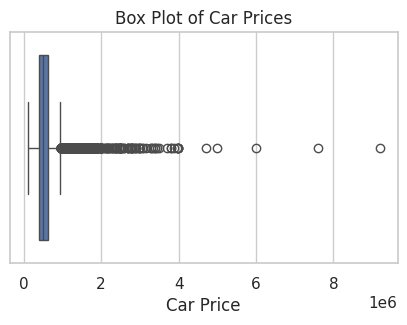

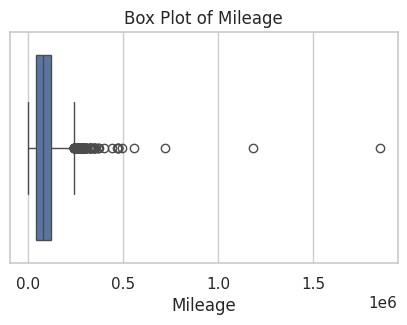

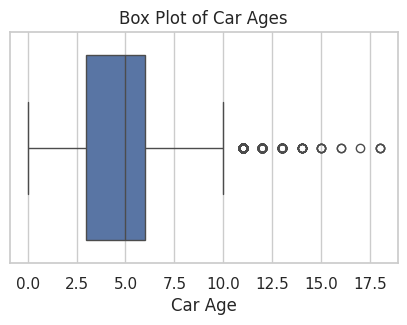

In [14]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='carPrice', data=data)
plt.title('Box Plot of Car Prices')
plt.xlabel('Car Price')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x='mileage', data=data)
plt.title('Box Plot of Mileage')
plt.xlabel('Mileage')
plt.show()


data['carAge'] = 2025 - data['carYear']
plt.figure(figsize=(5, 3))
sns.boxplot(x='carAge', data=data)
plt.title('Box Plot of Car Ages')
plt.xlabel('Car Age')
plt.show()

In [15]:
import pandas as pd

# Define the bin width
bin_width = 500000

# Create bins for the carPrice column
bins = range(0, int(data['carPrice'].max()) + bin_width, bin_width)

# Bin the carPrice column using pd.cut
data['carPriceBin'] = pd.cut(data['carPrice'], bins=bins)

# Calculate the frequency of each bin
frequency_binning = data['carPriceBin'].value_counts().sort_index()

frequency_binning

,count
carPriceBin,
"(0, 500000]",6117
"(500000, 1000000]",4102
"(1000000, 1500000]",423
"(1500000, 2000000]",107
"(2000000, 2500000]",32
"(2500000, 3000000]",24
"(3000000, 3500000]",10
"(3500000, 4000000]",9
"(4000000, 4500000]",0


**Interpretation :**

>Most cars fall into lower price ranges, mainly under 500,000, while higher price ranges have very few entries. This shows the data is concentrated at the lower end.

In [16]:
import re


# Function to extract numeric mileage
def extract_mileage(text):
  match = re.findall(r'\d+(?:,\d+)*', text)
  return int(match[0].replace(",", "")) if match else None


# Apply function to the column
data['mileageAvg'] = data['mileageAvg'].apply(extract_mileage)

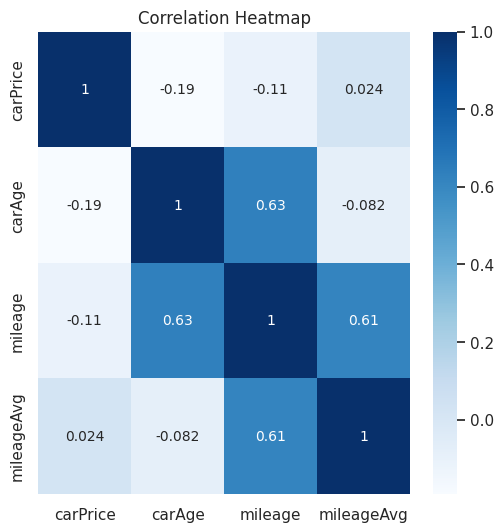

In [17]:
#scaled_data : robust scaler data['carPrice', 'carAge','mileage']

from sklearn.preprocessing import RobustScaler
features_to_scale = ['carPrice', 'carAge', 'mileageAvg','mileage']
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data[features_to_scale])
scaled_data = pd.DataFrame(scaled_data, columns=features_to_scale)

plt.figure(figsize = (6, 6))
numeric_columns = ['carPrice', 'carAge','mileage','mileageAvg']
heatmap_data = data[numeric_columns].corr()
annot_kws = {'fontsize': 10}  # Adjust the font size as needed

sns.heatmap(heatmap_data, cmap='Blues', annot=True, annot_kws=annot_kws)
plt.title('Correlation Heatmap')

plt.show()

**Interpretation :**

> Car price decreases with age and mileage, while carAge, mileage, and mileageAvg are strongly correlated, reflecting typical wear and depreciation over time.

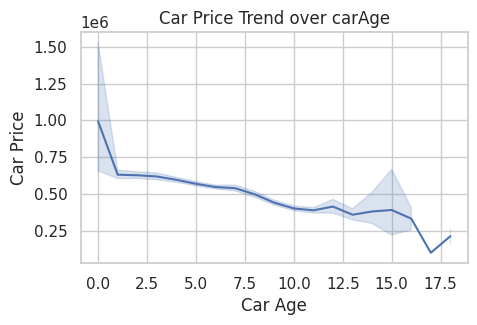

In [18]:
plt.figure(figsize=(5,3))
sns.lineplot(x='carAge', y='carPrice', data=data)
plt.title('Car Price Trend over carAge')
plt.xlabel('Car Age')
plt.ylabel('Car Price')
plt.grid(True)  # Add grid for better readability
plt.show()

**Interpretation :**

> Car prices decline steadily as cars get older, especially during the first 10 years. After year 15, prices drop sharply with greater variability.

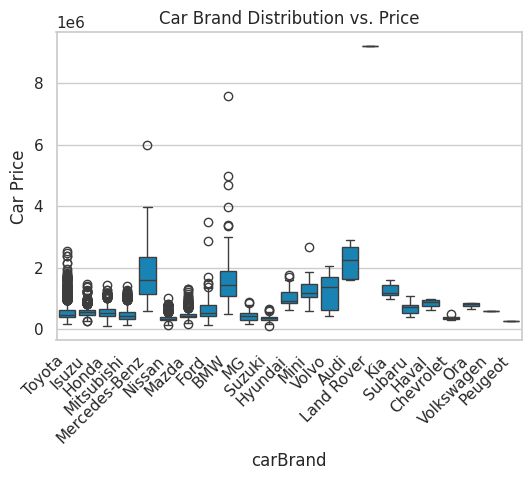

In [19]:
median_prices = data.groupby('carBrand')['carPrice'].sum().sort_values(ascending = False)

# Plot boxplot with brands sorted in ascending order of median prices
plt.figure(figsize=(6, 4))
sns.boxplot(x='carBrand', y='carPrice', data=data, order=median_prices.index, color = '#008ECC')
plt.title('Car Brand Distribution vs. Price')
plt.ylabel('Car Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

plt.show()

**Interpretation :**

>Top-selling brands like Toyota and Isuzu have moderate prices, while luxury brands like Mercedes-Benz and BMW show higher and more varied price distributions.


<Axes: xlabel='carSubSegment', ylabel='carPrice'>

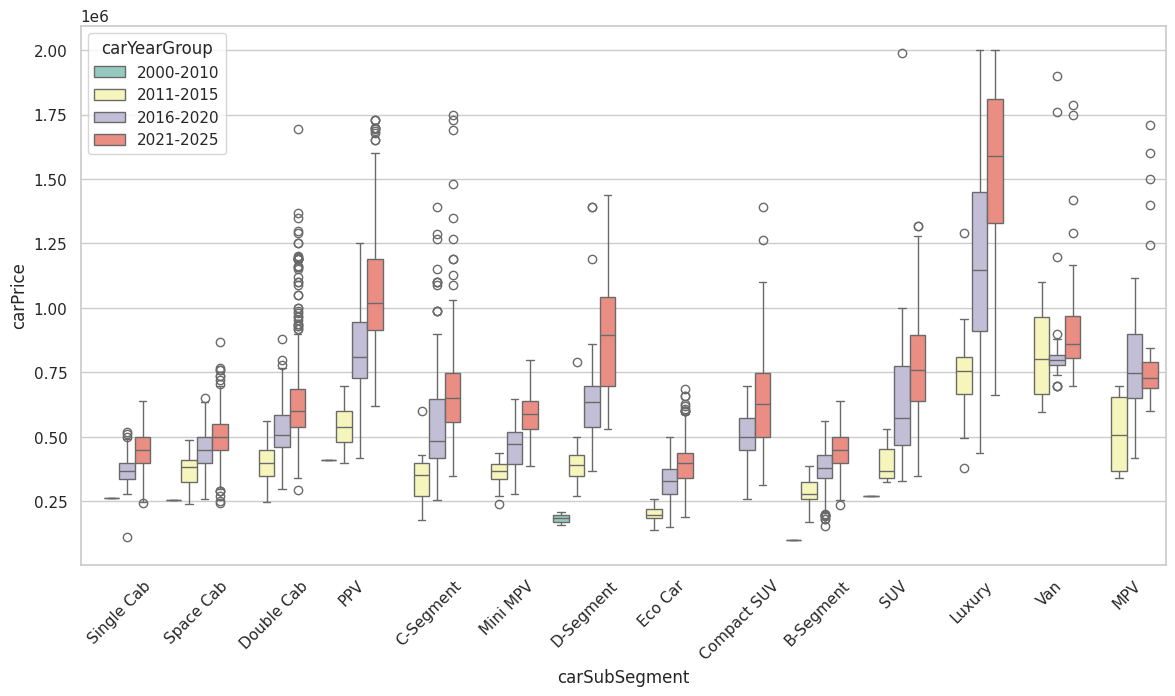

In [20]:
# Create year groups
bins = [2000, 2010, 2015, 2020, 2025]
labels = ['2000-2010', '2011-2015', '2016-2020', '2021-2025']
data['carYearGroup'] = pd.cut(data['carYear'], bins=bins, labels=labels, right=False)

# Filter out cars priced over 2 million
filtered_data = data[(data['carPrice'] < 2000000) & (data['carYearGroup'].notnull())]

# Plot boxplot with carSubSegment on x-axis, carPrice on y-axis, and hue by carYearGroup
plt.figure(figsize=(14, 7))
plt.xticks(rotation=45)
sns.boxplot(x='carSubSegment', y='carPrice', hue='carYearGroup', data=filtered_data, palette='Set3')

**Interpretation :**

>Car prices tend to increase with newer year groups (especially 2021–2025), and segments like PPV, SUV, and Luxury show the highest price ranges, while Eco Car, B-Segment, and Single Cab remain on the lower end with more stable pricing.

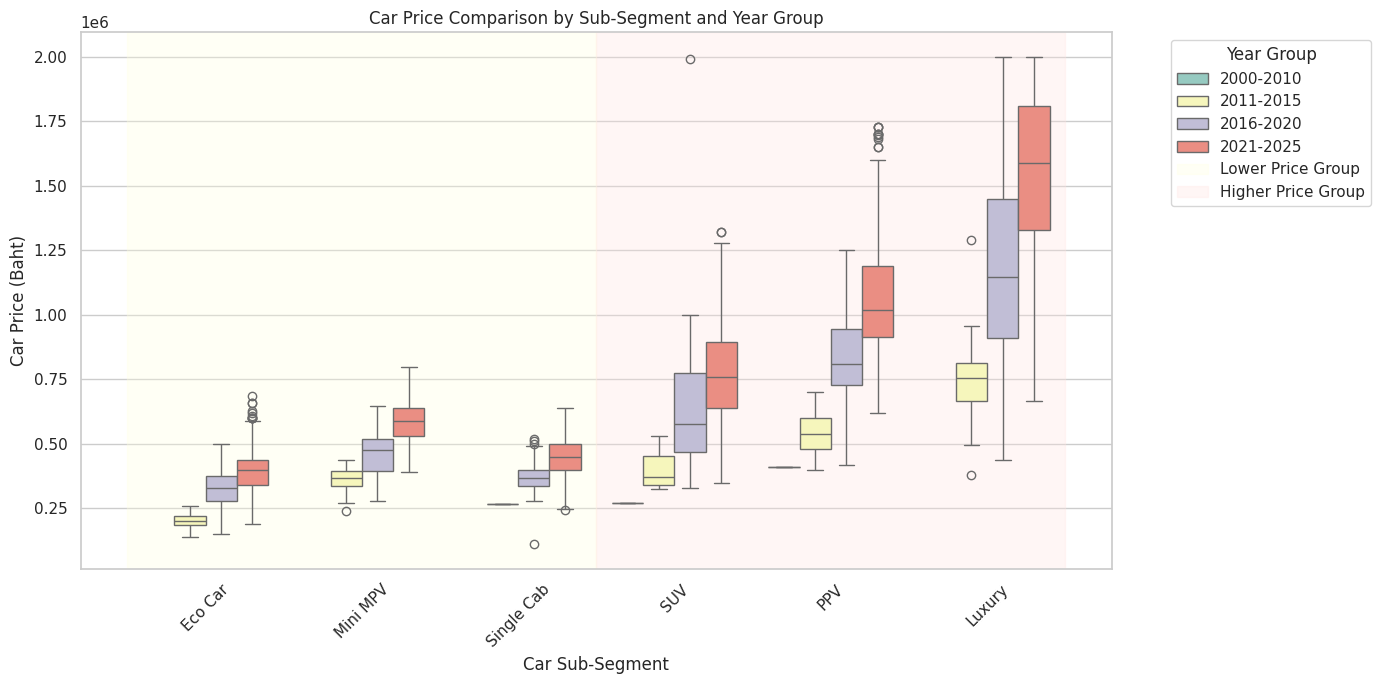

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define year groups
bins = [2000, 2010, 2015, 2020, 2025]
labels = ['2000-2010', '2011-2015', '2016-2020', '2021-2025']

# Check if 'carYear' column exists
if 'carYear' in data.columns:
    data['carYearGroup'] = pd.cut(data['carYear'], bins=bins, labels=labels, right=False)
else:
    print("Warning: 'carYear' column not found in DataFrame. Skipping carYearGroup creation.")

# Filter data: price under 2 million and valid year group
filtered_data = data[(data['carPrice'] < 2000000) & (data['carYearGroup'].notnull())]

# Specify target car segments (low price and high price groups)
target_segments = ['Eco Car', 'Mini MPV', 'Single Cab', 'SUV', 'PPV', 'Luxury']
filtered_data = filtered_data[filtered_data['carSubSegment'].isin(target_segments)]

# Plot
plt.figure(figsize=(14, 7))
ax = sns.boxplot(
    x='carSubSegment',
    y='carPrice',
    hue='carYearGroup',
    data=filtered_data,
    palette='Set3',
    order=target_segments
)

# Add background shading
plt.axvspan(-0.5, 2.5, color='lightyellow', alpha=0.3, label='Lower Price Group')
plt.axvspan(2.5, 5.5, color='mistyrose', alpha=0.3, label='Higher Price Group')

# Customize labels and title
plt.title('Car Price Comparison by Sub-Segment and Year Group')
plt.xlabel('Car Sub-Segment')
plt.ylabel('Car Price (Baht)')
plt.xticks(rotation=45)
plt.legend(title='Year Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Interpretation :**

>Newer car models from the 2021–2025 period clearly exhibit higher price levels compared to earlier years, especially in segments like SUV, PPV, and Luxury, which show a wide price range and higher upper limits.
In contrast, segments such as Eco Car, Mini MPV, and Single Cab maintain more stable pricing and demonstrate strong price competition.

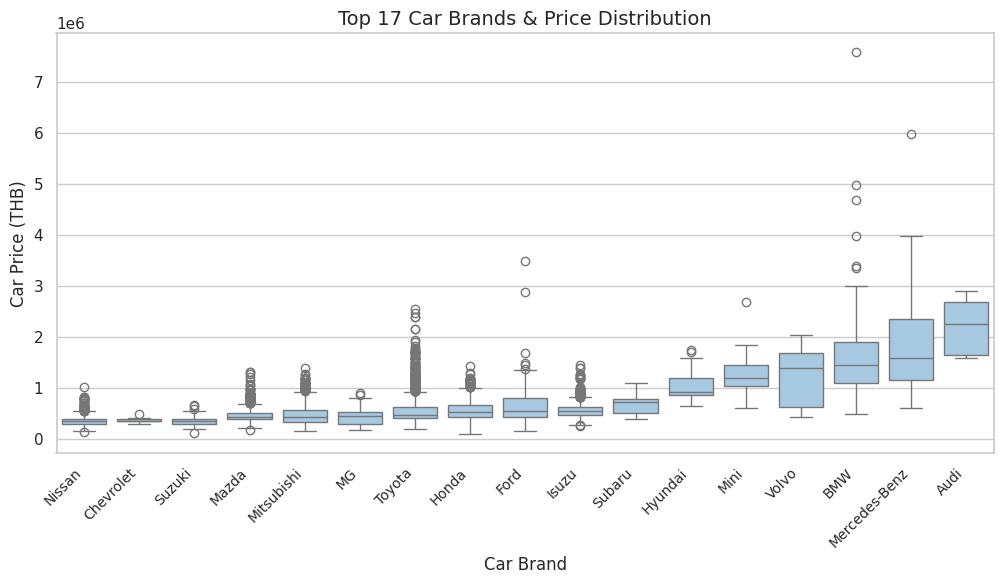

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 17 car brands with the most records
top_17_brands = data['carBrand'].value_counts().nlargest(17).index

# Filter data to include only the top 17 brands
filtered_data = data[data['carBrand'].isin(top_17_brands)]

# Sort brands by the median carPrice in ascending order
median_prices = (
    filtered_data.groupby('carBrand')['carPrice']
    .median()
    .sort_values()
)

# Plot a boxplot of car prices by brand, sorted by median price
plt.figure(figsize=(max(10, len(median_prices) * 0.6), 6))
sns.boxplot(
    x='carBrand',
    y='carPrice',
    data=filtered_data,
    order=median_prices.index,
    color='#9dcaeb'  # light blue tone
)

plt.title('Top 17 Car Brands & Price Distribution', fontsize=14)
plt.ylabel('Car Price (THB)')
plt.xlabel('Car Brand')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

**Interpretation :**

>This chart shows that luxury brands like BMW, Mercedes-Benz, and Audi have significantly higher car prices and wider price ranges, while brands like Nissan, Chevrolet, and Suzuki have lower and more consistent prices, reflecting their market positioning.

***

# **Why We Consider MAPE? :**


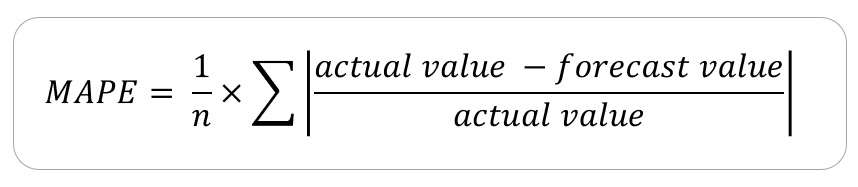

> **Insight**: Luxury brands like BMW, Mercedes-Benz, and Audi have higher and wider price ranges, while brands like Nissan, Chevrolet, and Suzuki have lower, more consistent prices, reflecting their market positioning.

> **Insight**: Older luxury cars, especially SUVs and PPVs, see a sharp price drop, while older economy cars experience a more gradual and steady decline.

We use MAPE because it offers a clear, percentage-based measure of accuracy, making it easy to interpret and compare model performance across different price ranges.

***

# **Modeling and Evaluation :**

## Predictive Modelling Steps

**Algorithm Selection**
   
>- **low-complexity models**: Decision Tree  
>- **ensemble methods**: Random Forest
>- **boosting techniques**: XGBOOST and CATBOOST


**Comparing Pipelines for Improved Performance with 3 Approaches.**

Approach 1) **Baseline Features**

> - Uses original features as a benchmark for comparison.

Approach 2) **Baseline +  Feature Engineering + Outlier Handling**

> - Improves pattern recognition and model generalization.

Approach 3) **Baseline + Feature Engineering + Outlier Handling + Regularization**

> - Further improves model generalization and prevents overfitting.

**Predefined Criteria :**  MAE (< 50,000), MAPE (<= 6-8%), R2 (>0.8)

**Key Evaluation Metric :**  MAPE




# Modelling and Evaluation : Approach 1)

## Data Preprocessing

- **Fuel** : Since some cars had missing or "unknown" fuel types, we used trusted sources from the internet to find the most common fuel based on each car’s carSubModel and carYear, then created mappings to impute missing values.


- **carCC** : Since some cars had carCC = 0 (invalid engine size), we used trusted online sources to find the most common carCC based on each car’s carSubModel and carYear, then created a mapping to impute missing values.


- **Number of seats** : We first removed clearly invalid values by replacing values less than 1 or greater than 15 with NaN. Then, we imputed missing values using the mode within each carSubModel group. For any remaining missing values, we used the minimum value within each carModel group


- **carSubModel** : Since some features like numberOfSeat and fuel were missing or inconsistent, we used the most frequent values within each carSubModel to fill in missing data, assuming that cars within the same submodel tend to share similar characteristics.


- **carColor** : We performed text correction to ensure consistency in color labels. For example, values like 'ขาว', 'สีขาว', and 'สีสีขาว' were all standardized to 'white'. In addition, we identified rows containing multiple colors (e.g., combinations like 'ดำ-แดง', 'ขาว/ดำ', etc.). There were such a few rows, which we grouped under a new category labeled 'multiple_colors' for clarity and to simplify further analysis.


- **mileageAvg** : We extract numerical mileage from mileageAvg, which follows the pattern "เฉลี่ย XX,XXX กม./ปี", by using regex to capture digits


- **licensePlateProvince** : Since Bangkok dominates with ~50% of all license plates. So, we decided to create; **isBangkok** : Labels cars as 'Bangkok' if the plate is from 'กรุงเทพมหานคร', otherwise 'OtherProvince'.


- **carAge** : calculate Age of each car by subtracting the car’s manufacturing year from the current year.

reload the dataset

In [3]:
data= pd.read_csv(file_path)  # reload the dataset

data = data.drop('carUrl', axis=1)
data = data.drop('repairHistory', axis=1)

In [4]:
import pandas as pd
import numpy as np
import re

def preprocessing1(df: pd.DataFrame, current_year: int = 2025) -> pd.DataFrame:
    # 1. Clean fuel
    fuel_mapping1 = df.groupby(['carSubModel', 'carYear'])['fuel'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
    df['fuel'] = df.apply(lambda row: fuel_mapping1.get((row['carSubModel'], row['carYear']))
                          if pd.isnull(row['fuel']) else row['fuel'], axis=1)

    fuel_mapping2 = df[df['fuel'] != 'unknown'].groupby('carSubModel')['fuel'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
    df.loc[df['fuel'] == 'unknown', 'fuel'] = df['carSubModel'].map(fuel_mapping2)

    specific_ids = ["CAR202507180123", "CAR202507230031", "CAR202506270109"]
    df.loc[df['id'].isin(specific_ids), 'fuel'] = 'Diesel'

    # Map to Diesel, Benzine, Others
    df['fuel'] = df['fuel'].apply(lambda x: x if x in ['Diesel', 'Benzine'] else 'Others')

    # One-hot encoding for fuel
    fuel_dummies = pd.get_dummies(df['fuel'], prefix='fuel')
    df = pd.concat([df.drop(columns=['fuel']), fuel_dummies], axis=1)

    # 2. Clean carCC
    carcc_mapping = df[df['carCC'] != 0].groupby('carSubModel')['carCC'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
    df.loc[df['carCC'] == 0, 'carCC'] = df['carSubModel'].map(carcc_mapping)
    df = df.dropna(subset=['carCC'])

    # 3. Clean carColor
    color_map = {
        "ขาว": "white", "สีขาว": "white", "สีสีขาว": "white",
        "ดำ": "black", "สีดำ": "black", "สีดํา": "black",
        "เทา": "gray", "สีเทา": "gray", "สีสีเทา": "gray",
        "เงิน": "silver", "สีเงิน": "silver",
        "แดง": "red", "สีแดง": "red",
        "น้ำเงิน": "blue", "สีน้ำเงิน": "blue",
        "ฟ้า": "light_blue", "สีฟ้า": "light_blue",
        "ส้ม": "orange", "สีส้ม": "orange",
        "น้ำตาล": "brown", "สีน้ำตาล": "brown", "สีนํ้าตาล": "brown",
        "เขียว": "green", "สีเขียว": "green",
        "เหลือง": "yellow", "สีเหลือง": "yellow",
        "ม่วง": "purple", "สีม่วง": "purple",
        "ชมพู": "pink", "สีชมพู": "pink"
    }
    df['carColor_clean'] = df['carColor'].str.strip().replace(color_map)
    df.loc[~df['carColor_clean'].isin(color_map.values()), 'carColor_clean'] = 'multiple_colors'
    df.drop(columns=['carColor'], inplace=True)

    # 4. Clean mileage
    def extract_mileage(text):
        match = re.findall(r'\d+(?:,\d+)*', str(text))
        return int(match[0].replace(",", "")) if match else None
    df['mileageAvg'] = df['mileageAvg'].apply(extract_mileage)

    # 5. isBangkok only
    df['isBangkok'] = np.where(df['licensePlateProvince'] == 'กรุงเทพมหานคร', 1, 0)
    df.drop(columns=['licensePlateProvince'], inplace=True)

    # 6. Clean seats
    df.loc[(df['numberOfSeat'] < 1) | (df['numberOfSeat'] > 15), 'numberOfSeat'] = np.nan
    df['numberOfSeat'] = df.groupby('carSubModel')['numberOfSeat'].transform(
        lambda x: x.mode().iloc[0] if x.mode().size > 0 else np.nan)
    df['numberOfSeat'] = df.groupby('carModel')['numberOfSeat'].transform(
        lambda x: x.min() if x.isnull().any() else x)
    df = df.dropna(subset=['numberOfSeat'])

    # 7. Add car age and group
    if 'carYear' in df.columns:
        df['carAge'] = current_year - df['carYear']
        bins = [2000, 2010, 2015, 2020, 2025]
        labels = ['2000-2010', '2011-2015', '2016-2020', '2021-2025']
        df['carYearGroup'] = pd.cut(df['carYear'], bins=bins, labels=labels, right=False)
        df.drop('carYear', axis=1, inplace=True)

    return df

In [5]:
data_model1 = preprocessing1(data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    10829 non-null  object
 1   carBrand              10829 non-null  object
 2   carModel              10829 non-null  object
 3   carSubModel           10829 non-null  object
 4   carType               10829 non-null  object
 5   carSubSegment         10829 non-null  object
 6   carYear               10829 non-null  int64 
 7   carCC                 10829 non-null  int64 
 8   carGear               10829 non-null  object
 9   carColor              10829 non-null  object
 10  carPrice              10829 non-null  int64 
 11  mileage               10829 non-null  int64 
 12  fuel                  10829 non-null  object
 13  numberOfSeat          10829 non-null  int64 
 14  licensePlateProvince  10829 non-null  object
 15  mileageAvg            10829 non-null

In [7]:
data_model1

,id,carBrand,carModel,carSubModel,carType,carSubSegment,carCC,carGear,carPrice,mileage,numberOfSeat,mileageAvg,fuel_Benzine,fuel_Diesel,fuel_Others,carColor_clean,isBangkok,carAge,carYearGroup
0,CAR202508280129,Toyota,Hilux Revo,Hilux Revo 2.8 J Plus Single Cab (MY18),Pick up,Single Cab,2800.0,M,395000,99078,2.0,24770,False,True,False,gray,1,4,2021-2025
1,CAR202510140010,Toyota,Hilux Revo,Hilux Revo Smart Cab 2.4 Entry Z Edition (MY20),Pick up,Space Cab,2400.0,M,429000,46116,2.0,23058,False,True,False,white,1,2,2021-2025
2,CAR202510080008,Isuzu,D-Max All New Blue Power,D-Max All New Blue Power Cab-4 Hi-Lander 1.9 D...,Pick up,Double Cab,1900.0,M,629000,34428,5.0,8607,False,True,False,gray,0,4,2021-2025
3,CAR202510300253,Toyota,Hilux Revo,Hilux Revo Double Cab 2.4 E Plus Prerunner (MNC),Pick up,Double Cab,2400.0,A,529200,115311,5.0,19219,False,True,False,gray,1,6,2016-2020
4,CAR202510130014,Toyota,Hilux Revo,Hilux Revo 2.4 J Single Cab,Pick up,Single Cab,2400.0,M,339000,160327,2.0,32065,False,True,False,white,1,5,2021-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,CAR202510160006,Hyundai,H-1,H-1 2.5 Elite+ (MNC),Van,Luxury,2500.0,A,910000,330079,11.0,47154,False,True,False,black,1,7,2016-2020
10825,CAR202507050012,Toyota,Hilux Revo,Hilux Revo 2.8 J Plus Single Cab (MY18),Pick up,Single Cab,2800.0,M,505000,110405,2.0,27601,False,True,False,white,0,4,2021-2025
10826,CAR202506080169,Nissan,NP300 Navara,NP300 Navara King Cab 2.5 EL Calibre,Pick up,Space Cab,2500.0,M,448000,84975,2.0,14163,False,True,False,black,0,6,2016-2020
10827,CAR202512140015,Toyota,Hilux Revo,Hilux Revo 2.4 Entry Z Edition Single Cab (MY22),Pick up,Single Cab,2400.0,M,519000,50396,2.0,50396,False,True,False,white,0,1,2021-2025


In [8]:
data_model1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10723 entries, 0 to 10828
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              10723 non-null  object  
 1   carBrand        10723 non-null  object  
 2   carModel        10723 non-null  object  
 3   carSubModel     10723 non-null  object  
 4   carType         10723 non-null  object  
 5   carSubSegment   10723 non-null  object  
 6   carCC           10723 non-null  float64 
 7   carGear         10723 non-null  object  
 8   carPrice        10723 non-null  int64   
 9   mileage         10723 non-null  int64   
 10  numberOfSeat    10723 non-null  float64 
 11  mileageAvg      10723 non-null  int64   
 12  fuel_Benzine    10723 non-null  bool    
 13  fuel_Diesel     10723 non-null  bool    
 14  fuel_Others     10723 non-null  bool    
 15  carColor_clean  10723 non-null  object  
 16  isBangkok       10723 non-null  int64   
 17  carAge          1

##Feature Encoding

In [9]:
import pandas as pd

data_model1 = data_model1.drop(['id', 'carSubModel', 'mileageAvg'], axis=1)

### Categorical Encoding

> **One hot encode:**


- carColor_clean : only top 3 colors


- carBrand : top 5 carBrand (cutoff = Nissan)


- fuel : Diesel, Benzine, Others


- carSubSegment, carGear, isBangkok, region, carType


In [10]:
# One-hot encode 'carColor_clean' for white, gray, black, and drop others
top_colors = ['white', 'gray', 'black']
for color in top_colors:
  data_model1[f'carColor_{color}'] = (data_model1['carColor_clean'] == color).astype(int)

data_model1 = data_model1.drop('carColor_clean', axis=1)

In [11]:
# One-hot encode 'carBrand' for top5 and drop others
top_brands = ['Toyota', 'Isuzu', 'Honda', 'Mitsubishi', 'Nissan']
for brand in top_brands:
  data_model1[f'carBrand_{brand}'] = (data_model1['carBrand'] == brand).astype(int)

data_model1 = data_model1.drop('carBrand', axis=1)

In [12]:
# Convert all boolean columns [fuel] to int
bool_cols = data_model1.select_dtypes(include='bool').columns
data_model1[bool_cols] = data_model1[bool_cols].astype(int)

In [13]:
# 'isBangkok' and set it to 1  otherwise 0
data_model1['isBangkok'] = (data_model1['isBangkok'] == 'Bangkok').astype(int)

In [14]:
import pandas as pd

data_model1 = data_model1.copy()

# Define categorical features to encode
features_to_encode = ['carSubSegment', 'carGear', 'carType']

# One-hot encode selected categorical features
encoded_features = pd.get_dummies(data_model1[features_to_encode], drop_first=True, dtype=int)

# Concatenate encoded features with the original dataframe
data_model1 = pd.concat([data_model1, encoded_features], axis=1)

# Drop the original categorical columns that were encoded, except 'carSubSegment'
data_model1 = data_model1.drop(columns=['carGear', 'carType'])


In [15]:
data_model1

,carModel,carSubSegment,carCC,carPrice,mileage,numberOfSeat,fuel_Benzine,fuel_Diesel,fuel_Others,isBangkok,...,carSubSegment_MPV,carSubSegment_Mini MPV,carSubSegment_PPV,carSubSegment_SUV,carSubSegment_Single Cab,carSubSegment_Space Cab,carSubSegment_Van,carGear_M,carType_Sedan,carType_Van
0,Hilux Revo,Single Cab,2800.0,395000,99078,2.0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,Hilux Revo,Space Cab,2400.0,429000,46116,2.0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,D-Max All New Blue Power,Double Cab,1900.0,629000,34428,5.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Hilux Revo,Double Cab,2400.0,529200,115311,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hilux Revo,Single Cab,2400.0,339000,160327,2.0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,H-1,Luxury,2500.0,910000,330079,11.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10825,Hilux Revo,Single Cab,2800.0,505000,110405,2.0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
10826,NP300 Navara,Space Cab,2500.0,448000,84975,2.0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
10827,Hilux Revo,Single Cab,2400.0,519000,50396,2.0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [16]:
data_model1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10723 entries, 0 to 10828
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   carModel                   10723 non-null  object  
 1   carSubSegment              10723 non-null  object  
 2   carCC                      10723 non-null  float64 
 3   carPrice                   10723 non-null  int64   
 4   mileage                    10723 non-null  int64   
 5   numberOfSeat               10723 non-null  float64 
 6   fuel_Benzine               10723 non-null  int64   
 7   fuel_Diesel                10723 non-null  int64   
 8   fuel_Others                10723 non-null  int64   
 9   isBangkok                  10723 non-null  int64   
 10  carAge                     10723 non-null  int64   
 11  carYearGroup               10687 non-null  category
 12  carColor_white             10723 non-null  int64   
 13  carColor_gray              10723 non

In [17]:
data_model1 = data_model1.drop(['carYearGroup'], axis=1)

In [18]:
data_model1

,carModel,carSubSegment,carCC,carPrice,mileage,numberOfSeat,fuel_Benzine,fuel_Diesel,fuel_Others,isBangkok,...,carSubSegment_MPV,carSubSegment_Mini MPV,carSubSegment_PPV,carSubSegment_SUV,carSubSegment_Single Cab,carSubSegment_Space Cab,carSubSegment_Van,carGear_M,carType_Sedan,carType_Van
0,Hilux Revo,Single Cab,2800.0,395000,99078,2.0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,Hilux Revo,Space Cab,2400.0,429000,46116,2.0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,D-Max All New Blue Power,Double Cab,1900.0,629000,34428,5.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Hilux Revo,Double Cab,2400.0,529200,115311,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hilux Revo,Single Cab,2400.0,339000,160327,2.0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,H-1,Luxury,2500.0,910000,330079,11.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10825,Hilux Revo,Single Cab,2800.0,505000,110405,2.0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
10826,NP300 Navara,Space Cab,2500.0,448000,84975,2.0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
10827,Hilux Revo,Single Cab,2400.0,519000,50396,2.0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [19]:
data_model1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10723 entries, 0 to 10828
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   carModel                   10723 non-null  object 
 1   carSubSegment              10723 non-null  object 
 2   carCC                      10723 non-null  float64
 3   carPrice                   10723 non-null  int64  
 4   mileage                    10723 non-null  int64  
 5   numberOfSeat               10723 non-null  float64
 6   fuel_Benzine               10723 non-null  int64  
 7   fuel_Diesel                10723 non-null  int64  
 8   fuel_Others                10723 non-null  int64  
 9   isBangkok                  10723 non-null  int64  
 10  carAge                     10723 non-null  int64  
 11  carColor_white             10723 non-null  int64  
 12  carColor_gray              10723 non-null  int64  
 13  carColor_black             10723 non-null  int64  


##Numerical Encoding

### Data Splitting Technique  :


The dataset was split into 80% training and 20% test, with 20% of the training data further used for validation. **Stratification by carSubSegment** was applied in both steps, ensuring consistent class distribution across all sets and reducing potential bias in model performance.


source :[Stratification on Regression Problems](https://medium.com/@nlztrk/stratification-on-regression-problems-e36b3b866079)


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data_model1.drop(['carPrice'], axis=1)
y = data_model1['carPrice']

# Perform train/test split while keeping stratification based on 'carSubSegment'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data_model1['carSubSegment'])
# Perform train/validation split on the train set, again stratifying by 'carSubSegment'
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=X_train['carSubSegment'])

In [21]:
# Check the proportion of 'carSubSegment' in each split
print("Train set 'carSubSegment' proportion:\n", X_train['carSubSegment'].value_counts(normalize=True))
print("\nValidation set 'carSubSegment' proportion:\n", X_val['carSubSegment'].value_counts(normalize=True))
print("\nTest set 'carSubSegment' proportion:\n", X_test['carSubSegment'].value_counts(normalize=True))

Train set 'carSubSegment' proportion:
 carSubSegment
Eco Car        0.212329
Space Cab      0.209997
Double Cab     0.143981
B-Segment      0.100554
C-Segment      0.069222
PPV            0.066453
Compact SUV    0.048528
Single Cab     0.034684
D-Segment      0.031623
Luxury         0.026377
SUV            0.024191
Mini MPV       0.018799
Van            0.009181
MPV            0.004080
Name: proportion, dtype: float64

Validation set 'carSubSegment' proportion:
 carSubSegment
Eco Car        0.212121
Space Cab      0.209790
Double Cab     0.143939
B-Segment      0.100816
C-Segment      0.069347
PPV            0.066434
Compact SUV    0.048368
Single Cab     0.034965
D-Segment      0.031469
Luxury         0.026224
SUV            0.024476
Mini MPV       0.018648
Van            0.009324
MPV            0.004079
Name: proportion, dtype: float64

Test set 'carSubSegment' proportion:
 carSubSegment
Eco Car        0.212587
Space Cab      0.210256
Double Cab     0.144056
B-Segment      0.100699
C

In [22]:
X_train = X_train.drop(columns=['carSubSegment'])
X_val = X_val.drop(columns=['carSubSegment'])
X_test = X_test.drop(columns=['carSubSegment'])

In [23]:
print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))

print("\nThe size of the input validation data is: {}".format(X_val.shape))
print("The size of the output validation data is: {}".format(y_val.shape))

print("\nThe size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))

The size of the input train data is: (6862, 33)
The size of the output train data is: (6862,)

The size of the input validation data is: (1716, 33)
The size of the output validation data is: (1716,)

The size of the input test data is: (2145, 33)
The size of the output test data is: (2145,)


#### Standardize Numerical Data

In [24]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
scale_cols = ['mileage', 'numberOfSeat', 'carAge', 'carCC']

# Create the scaler and fit ONLY on training data
scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])


# Apply the same transformation to test and validation sets
X_test[scale_cols] = scaler.transform(X_test[scale_cols])
X_val[scale_cols] = scaler.transform(X_val[scale_cols])

#### Target Encoding - carModel

Target encoding was applied to the high-dimensional **carModel** feature by **replacing each model with its average carPrice from the training data**. This captures the relationship between car models and prices while preventing data leakage by encoding after data splitting, ensuring better generalization on validation and test sets.


source : [Encoding Categorical Variables: A Deep Dive into Target Encoding](https://medium.com/data-science/encoding-categorical-variables-a-deep-dive-into-target-encoding-2862217c2753)


In [25]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.3 MB/s eta 0:00:00


In [26]:
import category_encoders as ce

# Initialize the target encoder
encoder = ce.TargetEncoder(cols=['carModel'])

# Fit and transform on the training set
X_train['carModel_encoded'] = encoder.fit_transform(X_train['carModel'], y_train.to_frame()['carPrice'])

# Transform the validation and test sets
X_val['carModel_encoded'] = encoder.transform(X_val['carModel'])
X_test['carModel_encoded'] = encoder.transform(X_test['carModel'])

In [27]:
X_train = X_train.drop(columns=['carModel'])
X_val = X_val.drop(columns=['carModel'])
X_test = X_test.drop(columns=['carModel'])

##Modeling

###SVR

####Feature Selection

In [49]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Normalize ก่อน (เฉพาะ X_train/X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Feature Selection ทำเฉพาะกับ X_train
selector = SelectKBest(score_func=f_regression, k=10)  # เลือก top 10 feature
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# ใช้ selector เดิม transform val/test set
X_val_selected = selector.transform(X_val_scaled)
X_test_selected = selector.transform(X_test_scaled)

# ชื่อของ feature ที่ถูกเลือก
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['carCC', 'numberOfSeat', 'fuel_Benzine', 'fuel_Others', 'carAge',
       'carBrand_Nissan', 'carSubSegment_Eco Car', 'carSubSegment_Luxury',
       'carSubSegment_PPV', 'carModel_encoded'],
      dtype='object')


####Model

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.svm import SVR

# Normalize y
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1)).ravel()

svr = SVR(kernel='rbf')
svr.fit(X_train_selected, y_train_scaled)

y_train_pred_scaled = svr.predict(X_train_selected)
y_val_pred_scaled = svr.predict(X_val_selected)

# inverse
y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_val_pred = y_scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).ravel()


# Calculate MAE, MAPE, and R2 for the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MAE, MAPE, and R2 for the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the results
print("Train Set Evaluation:")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R2: {r2_train:.4f}")

print("\nValidation Set Evaluation:")
print(f"MAE: {mae_val:.4f}")
print(f"MAPE: {mape_val:.4f}")
print(f"R2: {r2_val:.4f}")

Train Set Evaluation:
MAE: 61462.6729
MAPE: 0.1066
R2: 0.8603

Validation Set Evaluation:
MAE: 67491.3849
MAPE: 0.1074
R2: 0.7706


In [51]:
# Normalize y
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

y_test_pred_scaled = svr.predict(X_test_selected)

# inverse
y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate MAE, MAPE, and R2 for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("\nTest Set Evaluation:")
print(f"MAE: {mae_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R2: {r2_test:.4f}")


Test Set Evaluation:
MAE: 70359.0119
MAPE: 0.1058
R2: 0.6360


###RandomForest

####Model

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the train and validation sets
y_train_pred = rf_regressor.predict(X_train)
y_val_pred = rf_regressor.predict(X_val)

# Calculate MAE, MAPE, and R2 for the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MAE, MAPE, and R2 for the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the results
print("Train Set Evaluation:")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R2: {r2_train:.4f}")

print("\nValidation Set Evaluation:")
print(f"MAE: {mae_val:.4f}")
print(f"MAPE: {mape_val:.4f}")
print(f"R2: {r2_val:.4f}")


Train Set Evaluation:
MAE: 20153.4875
MAPE: 0.0353
R2: 0.9865

Validation Set Evaluation:
MAE: 62782.9273
MAPE: 0.0981
R2: 0.7533


In [53]:
y_test_pred = rf_regressor.predict(X_test)  # Predictions for the test set

# Calculate MAE, MAPE, and R2 for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("\nTest Set Evaluation:")
print(f"MAE: {mae_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R2: {r2_test:.4f}")


Test Set Evaluation:
MAE: 65401.9939
MAPE: 0.0963
R2: 0.5788


###XGBoost

####Model

In [54]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Initialize the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the train and validation sets
y_train_pred = xgb_regressor.predict(X_train)
y_val_pred = xgb_regressor.predict(X_val)

# Calculate MAE, MAPE, and R2 for the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MAE, MAPE, and R2 for the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the results
print("Train Set Evaluation:")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R2: {r2_train:.4f}")

print("\nValidation Set Evaluation:")
print(f"MAE: {mae_val:.4f}")
print(f"MAPE: {mape_val:.4f}")
print(f"R2: {r2_val:.4f}")

Train Set Evaluation:
MAE: 33175.9883
MAPE: 0.0642
R2: 0.9777

Validation Set Evaluation:
MAE: 59800.1016
MAPE: 0.0939
R2: 0.7943


In [55]:
y_test_pred = xgb_regressor.predict(X_test)  # Predictions for the test set

# Calculate MAE, MAPE, and R2 for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("\nTest Set Evaluation:")
print(f"MAE: {mae_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R2: {r2_test:.4f}")


Test Set Evaluation:
MAE: 62621.4844
MAPE: 0.0917
R2: 0.6024


###**CatBoost**

Special Case for CatBoost:

We apply the preprocessing1 function, skipping encoding for categorical features, while performing standard preprocessing on numerical features. The first model is then trained using these processed inputs.

In [28]:
datacat = preprocessing1(data)

In [29]:
datacat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10723 entries, 0 to 10828
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              10723 non-null  object  
 1   carBrand        10723 non-null  object  
 2   carModel        10723 non-null  object  
 3   carSubModel     10723 non-null  object  
 4   carType         10723 non-null  object  
 5   carSubSegment   10723 non-null  object  
 6   carCC           10723 non-null  float64 
 7   carGear         10723 non-null  object  
 8   carPrice        10723 non-null  int64   
 9   mileage         10723 non-null  int64   
 10  numberOfSeat    10723 non-null  float64 
 11  mileageAvg      10723 non-null  int64   
 12  fuel_Benzine    10723 non-null  bool    
 13  fuel_Diesel     10723 non-null  bool    
 14  fuel_Others     10723 non-null  bool    
 15  carColor_clean  10723 non-null  object  
 16  isBangkok       10723 non-null  int64   
 17  carAge          1

In [30]:
datacat = datacat.drop(['id', 'carSubModel', 'carYearGroup', 'mileageAvg'], axis=1)

In [31]:
top_colors = ['white', 'gray', 'black']
datacat.loc[~datacat['carColor_clean'].isin(top_colors), 'carColor_clean'] = 'other'

top_brands = ['Toyota', 'Isuzu', 'Honda', 'Mitsubishi', 'Nissan']
datacat.loc[~datacat['carBrand'].isin(top_brands), 'carBrand'] = 'other'

In [32]:
datacat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10723 entries, 0 to 10828
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carBrand        10723 non-null  object 
 1   carModel        10723 non-null  object 
 2   carType         10723 non-null  object 
 3   carSubSegment   10723 non-null  object 
 4   carCC           10723 non-null  float64
 5   carGear         10723 non-null  object 
 6   carPrice        10723 non-null  int64  
 7   mileage         10723 non-null  int64  
 8   numberOfSeat    10723 non-null  float64
 9   fuel_Benzine    10723 non-null  bool   
 10  fuel_Diesel     10723 non-null  bool   
 11  fuel_Others     10723 non-null  bool   
 12  carColor_clean  10723 non-null  object 
 13  isBangkok       10723 non-null  int64  
 14  carAge          10723 non-null  int64  
dtypes: bool(3), float64(2), int64(4), object(6)
memory usage: 1.1+ MB


In [33]:
from sklearn.model_selection import train_test_split
#split train/test/validation set
X_cat_1 = datacat.drop(['carPrice'], axis=1)
y_cat = datacat['carPrice']

# Perform train/test split while keeping stratification based on 'carSubSegment'
X_cat_train_1, X_cat_test_1, y_cat_train, y_cat_test = train_test_split(X_cat_1, y_cat, test_size=0.2, random_state=42, stratify=datacat['carSubSegment'])
# Perform train/validation split on the train set, again stratifying by 'carSubSegment'
X_cat_train_1, X_cat_val_1, y_cat_train, y_cat_val = train_test_split(X_cat_train_1, y_cat_train, test_size=0.2, random_state=42, stratify=X_cat_train_1['carSubSegment'])

X_cat_train_1 = X_cat_train_1.drop(columns=['carSubSegment'])
X_cat_val_1 = X_cat_val_1.drop(columns=['carSubSegment'])
X_cat_test_1 = X_cat_test_1.drop(columns=['carSubSegment'])

In [34]:
from sklearn.preprocessing import StandardScaler
scale_cols = ['mileage', 'numberOfSeat', 'carAge', 'carCC']
scaler_cat = StandardScaler()
X_cat_train_1[scale_cols] = scaler_cat.fit_transform(X_cat_train_1[scale_cols])

# Apply the same transformation to test and validation sets
X_cat_test_1[scale_cols] = scaler_cat.transform(X_cat_test_1[scale_cols])
X_cat_val_1[scale_cols] = scaler_cat.transform(X_cat_val_1[scale_cols])

In [35]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['carModel'])
X_cat_train_1['carModel_encoded'] = encoder.fit_transform(X_cat_train_1['carModel'], y_cat_train.to_frame()['carPrice'])

# Transform the validation and test sets
X_cat_val_1['carModel_encoded'] = encoder.transform(X_cat_val_1['carModel'])
X_cat_test_1['carModel_encoded'] = encoder.transform(X_cat_test_1['carModel'])

X_cat_train_1 = X_cat_train_1.drop(columns=['carModel'])
X_cat_val_1 = X_cat_val_1.drop(columns=['carModel'])
X_cat_test_1 = X_cat_test_1.drop(columns=['carModel'])

In [36]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00


In [65]:
from catboost import CatBoostRegressor

categorical_features = ['carBrand', 'carType', 'carGear', 'carColor_clean', 'isBangkok']

# Initiate and train the model using the encoded data
cat_regressor = CatBoostRegressor(iterations=1000,
                          depth=6,
                          loss_function='MAE',
                          eval_metric='MAPE',
                          random_seed=42,
                          verbose=100,
                          cat_features=categorical_features
                          )

cat_regressor.fit(X_cat_train_1, y_cat_train,
          eval_set=(X_cat_val_1, y_cat_val),
          early_stopping_rounds=100)

0:	learn: 0.2772758	test: 0.2734743	best: 0.2734743 (0)	total: 70.9ms	remaining: 1m 10s
100:	learn: 0.1146429	test: 0.1188762	best: 0.1188762 (100)	total: 1.15s	remaining: 10.3s
200:	learn: 0.1022107	test: 0.1067697	best: 0.1067697 (200)	total: 2.03s	remaining: 8.09s
300:	learn: 0.0967152	test: 0.1022147	best: 0.1022147 (300)	total: 2.68s	remaining: 6.23s
400:	learn: 0.0926465	test: 0.0992636	best: 0.0992636 (400)	total: 4.01s	remaining: 5.98s
500:	learn: 0.0897875	test: 0.0974468	best: 0.0974468 (500)	total: 5.52s	remaining: 5.49s
600:	learn: 0.0880106	test: 0.0966213	best: 0.0966213 (600)	total: 6.2s	remaining: 4.11s
700:	learn: 0.0867146	test: 0.0961344	best: 0.0961290 (692)	total: 6.84s	remaining: 2.92s
800:	learn: 0.0854910	test: 0.0956013	best: 0.0955979 (795)	total: 7.51s	remaining: 1.86s
900:	learn: 0.0845860	test: 0.0953499	best: 0.0953447 (896)	total: 8.17s	remaining: 897ms
999:	learn: 0.0838182	test: 0.0951734	best: 0.0951675 (998)	total: 8.82s	remaining: 0us

bestTest = 0.0

In [66]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
# Make predictions on the train set
y_train_pred_1 = cat_regressor.predict(X_cat_train_1)

# Calculate MAE, MAPE, and R2 for the train set
mae_train_1 = mean_absolute_error(y_cat_train, y_train_pred_1)
mape_train_1 = mean_absolute_percentage_error(y_cat_train, y_train_pred_1)
r2_train_1 = r2_score(y_cat_train, y_train_pred_1)

# Make predictions on the test set
y_test_pred_1 = cat_regressor.predict(X_cat_test_1)

# Calculate MAE, MAPE, and R2 for the test set
mae_test_1 = mean_absolute_error(y_cat_test, y_test_pred_1)
mape_test_1 = mean_absolute_percentage_error(y_cat_test, y_test_pred_1)
r2_test_1 = r2_score(y_cat_test, y_test_pred_1)

print("Train Set Evaluation:")
print(f"MAE: {mae_train_1:.4f}")
print(f"MAPE: {mape_train_1:.4f}")
print(f"R2: {r2_train_1:.4f}")

print("\nTest Set Evaluation:")
print(f"MAE: {mae_test_1:.4f}")
print(f"MAPE: {mape_test_1:.4f}")
print(f"R2: {r2_test_1:.4f}")

Train Set Evaluation:
MAE: 51390.8302
MAPE: 0.0850
R2: 0.8789

Test Set Evaluation:
MAE: 66779.7964
MAPE: 0.0951
R2: 0.5779


####Model

## Summary

- After building models using SVR, Random Forest, CatBoost, and XGBoost in Approach 1, we found that the prediction performance was still suboptimal. The MAE and MAPE scores were relatively high, and the R² values indicated limited ability to explain the variance in car prices.
- After further analysis, we identified several reasons that could have contributed to this outcome. First, *no outlier removal* was applied, so extreme values—such as unusually high or low prices or mileage—likely distorted the model’s learning process.
- Additionally, the fuel feature, which was encoded into 3 categories including a broad and imprecise “Other” group, may have introduced ambiguity that reduced the model’s ability to detect meaningful patterns.
- Moreover, we only included a binary isBangkok feature without utilizing more granular regional information, which might have helped capture *regional price variation*.

**Key for Improvement:**

Given these limitations, **we proposed Approach 2** to enhance preprocessing including :

> - removing outliers with Isolation Forest

> - introducing a **Fuel_Diesel** feature, reducing fuel to just 2 well-defined categories (Benzine and Diesel)

> - introducing a **region** feature grouping Thai provinces into broader regions based on geography

# Modelling and Evaluation : Approach 2)

In [37]:
data= pd.read_csv(file_path)  # reload the dataset

data = data.drop('carUrl', axis=1)
data = data.drop('repairHistory', axis=1)


In [38]:
data.head()

,id,carBrand,carModel,carSubModel,carType,carSubSegment,carYear,carCC,carGear,carColor,carPrice,mileage,fuel,numberOfSeat,licensePlateProvince,mileageAvg
0,CAR202508280129,Toyota,Hilux Revo,Hilux Revo 2.8 J Plus Single Cab (MY18),Pick up,Single Cab,2021,2800,M,เทา,395000,99078,Diesel,2,กรุงเทพมหานคร,"เฉลี่ย 24,770 กม./ปี"
1,CAR202510140010,Toyota,Hilux Revo,Hilux Revo Smart Cab 2.4 Entry Z Edition (MY20),Pick up,Space Cab,2023,2400,M,ขาว,429000,46116,Diesel,2,กรุงเทพมหานคร,"เฉลี่ย 23,058 กม./ปี"
2,CAR202510080008,Isuzu,D-Max All New Blue Power,D-Max All New Blue Power Cab-4 Hi-Lander 1.9 D...,Pick up,Double Cab,2021,1900,M,สีเทา,629000,34428,Diesel,5,ชลบุรี,"เฉลี่ย 8,607 กม./ปี"
3,CAR202510300253,Toyota,Hilux Revo,Hilux Revo Double Cab 2.4 E Plus Prerunner (MNC),Pick up,Double Cab,2019,2400,A,สีเทา,529200,115311,Diesel,5,กรุงเทพมหานคร,"เฉลี่ย 19,219 กม./ปี"
4,CAR202510130014,Toyota,Hilux Revo,Hilux Revo 2.4 J Single Cab,Pick up,Single Cab,2020,2400,M,สีขาว,339000,160327,Diesel,2,กรุงเทพมหานคร,"เฉลี่ย 32,065 กม./ปี"


## Data Preprocess


In [39]:
import pandas as pd
import numpy as np
import re

def preprocessing2(df: pd.DataFrame, current_year: int = 2025) -> pd.DataFrame:
    # 1. Clean fuel
    fuel_mapping1 = df.groupby(['carSubModel', 'carYear'])['fuel'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
    df['fuel'] = df.apply(lambda row: fuel_mapping1.get((row['carSubModel'], row['carYear']))
                          if pd.isnull(row['fuel']) else row['fuel'], axis=1)

    fuel_mapping2 = df[df['fuel'] != 'unknown'].groupby('carSubModel')['fuel'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
    df.loc[df['fuel'] == 'unknown', 'fuel'] = df['carSubModel'].map(fuel_mapping2)

    specific_ids = ["CAR202507180123", "CAR202507230031", "CAR202506270109"]
    df.loc[df['id'].isin(specific_ids), 'fuel'] = 'Diesel'
    df = df[df['fuel'].isin(['Diesel', 'Benzine'])]

    # 2. Clean carCC
    carcc_mapping = df[df['carCC'] != 0].groupby('carSubModel')['carCC'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
    df.loc[df['carCC'] == 0, 'carCC'] = df['carSubModel'].map(carcc_mapping)
    df = df.dropna(subset=['carCC'])

    # 3. Clean carColor
    color_map = {
        "ขาว": "white", "สีขาว": "white", "สีสีขาว": "white",
        "ดำ": "black", "สีดำ": "black", "สีดํา": "black",
        "เทา": "gray", "สีเทา": "gray", "สีสีเทา": "gray",
        "เงิน": "silver", "สีเงิน": "silver",
        "แดง": "red", "สีแดง": "red",
        "น้ำเงิน": "blue", "สีน้ำเงิน": "blue",
        "ฟ้า": "light_blue", "สีฟ้า": "light_blue",
        "ส้ม": "orange", "สีส้ม": "orange",
        "น้ำตาล": "brown", "สีน้ำตาล": "brown", "สีนํ้าตาล": "brown",
        "เขียว": "green", "สีเขียว": "green",
        "เหลือง": "yellow", "สีเหลือง": "yellow",
        "ม่วง": "purple", "สีม่วง": "purple",
        "ชมพู": "pink", "สีชมพู": "pink"
    }
    df['carColor_clean'] = df['carColor'].str.strip().replace(color_map)
    df.loc[~df['carColor_clean'].isin(color_map.values()), 'carColor_clean'] = 'multiple_colors'
    df.drop(columns=['carColor'], inplace=True)

    # 4. Feature Imputation
    g1 = df.groupby("carSubModel")
    g2 = df.groupby("carModel")
    g3 = df.groupby(["carModel", "carSubModel"])

    df["numberOfSeat"] = g2['numberOfSeat'].transform(lambda x: x.mode().iloc[0] if x.mode().size > 0 else x.min())
    df['carCC'] = g3['carCC'].transform(lambda x: x.replace({0: x.mode().iloc[0] if x.mode().size > 0 else x.max()}) if (x.name != 'EV') else x)
    df['fuel'] = g1['fuel'].transform(lambda x: x if 'unknown' not in x.values else x.mode()[0])

    # 5. Clean mileage
    def extract_mileage(text):
        match = re.findall(r'\d+(?:,\d+)*', str(text))
        return int(match[0].replace(",", "")) if match else None
    df['mileageAvg'] = df['mileageAvg'].apply(extract_mileage)

    # 6. Region enrichment
    def categorize_province(province):
        if province in ['กรุงเทพมหานคร', 'นนทบุรี', 'ปทุมธานี', 'สมุทรปราการ', 'สมุทรสาคร', 'นครปฐม']:
            return 'BangkokAndSurroundingAreas'
        elif province in ['เชียงราย', 'แม่ฮ่องสอน', 'เชียงใหม่', 'ลำพูน', 'ลำปาง', 'พะเยา', 'น่าน', 'แพร่',
                          'อุตรดิตถ์', 'สุโขทัย', 'ตาก', 'กำแพงเพชร', 'พิษณุโลก', 'พิจิตร', 'เพชรบูรณ์']:
            return 'Northern'
        elif province in ['หนองคาย', 'เลย', 'หนองบัวลำภู', 'อุดรธานี', 'สกลนคร', 'นครพนม', 'มุกดาหาร',
                          'กาฬสินธุ์', 'ขอนแก่น', 'มหาสารคาม', 'ร้อยเอ็ด', 'ยโสธร', 'อำนาจเจริญ', 'ชัยภูมิ',
                          'นครราชสีมา', 'บุรีรัมย์', 'สุรินทร์', 'ศรีสะเกษ', 'อุบลราชธานี', 'บึงกาฬ']:
            return 'Northeastern'
        elif province in ['นครสวรรค์', 'อุทัยธานี', 'ชัยนาท', 'สิงห์บุรี', 'ลพบุรี', 'อ่างทอง', 'สระบุรี',
                          'สุพรรณบุรี', 'พระนครศรีอยุธยา', 'กาญจนบุรี', 'ราชบุรี', 'สมุทรสงคราม']:
            return 'Central'
        elif province in ['นครนายก', 'ฉะเชิงเทรา', 'ปราจีนบุรี', 'สระแก้ว', 'ชลบุรี', 'ระยอง', 'จันทบุรี', 'ตราด']:
            return 'Eastern'
        else:
            return 'Southern'

    df['region'] = df['licensePlateProvince'].apply(categorize_province)
    df['isBangkok'] = np.where(df['licensePlateProvince'] == 'กรุงเทพมหานคร', 'Bangkok', 'OtherProvince')

    # 7. Clean seats
    df.loc[(df['numberOfSeat'] < 1) | (df['numberOfSeat'] > 15), 'numberOfSeat'] = np.nan
    df['numberOfSeat'] = df.groupby('carSubModel')['numberOfSeat'].transform(
        lambda x: x.mode().iloc[0] if x.mode().size > 0 else np.nan)
    df['numberOfSeat'] = df.groupby('carModel')['numberOfSeat'].transform(
        lambda x: x.min() if x.isnull().any() else x)
    df = df.dropna(subset=['numberOfSeat'])

    # 8. Add car age and group
    if 'carYear' in df.columns:
        df['carAge'] = current_year - df['carYear']
        bins = [2000, 2010, 2015, 2020, 2025]
        labels = ['2000-2010', '2011-2015', '2016-2020', '2021-2025']
        df['carYearGroup'] = pd.cut(df['carYear'], bins=bins, labels=labels, right=False)
        df.drop('carYear', axis=1, inplace=True)

    return df


In [40]:
data_model2 = preprocessing2(data)

<ipython-input-39-e0f19674b603>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['carAge'] = current_year - df['carYear']
<ipython-input-39-e0f19674b603>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['carYearGroup'] = pd.cut(df['carYear'], bins=bins, labels=labels, right=False)
<ipython-input-39-e0f19674b603>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [41]:
data_model2

,id,carBrand,carModel,carSubModel,carType,carSubSegment,carCC,carGear,carPrice,mileage,fuel,numberOfSeat,licensePlateProvince,mileageAvg,carColor_clean,region,isBangkok,carAge,carYearGroup
0,CAR202508280129,Toyota,Hilux Revo,Hilux Revo 2.8 J Plus Single Cab (MY18),Pick up,Single Cab,2800.0,M,395000,99078,Diesel,2.0,กรุงเทพมหานคร,24770,gray,BangkokAndSurroundingAreas,Bangkok,4,2021-2025
1,CAR202510140010,Toyota,Hilux Revo,Hilux Revo Smart Cab 2.4 Entry Z Edition (MY20),Pick up,Space Cab,2400.0,M,429000,46116,Diesel,2.0,กรุงเทพมหานคร,23058,white,BangkokAndSurroundingAreas,Bangkok,2,2021-2025
2,CAR202510080008,Isuzu,D-Max All New Blue Power,D-Max All New Blue Power Cab-4 Hi-Lander 1.9 D...,Pick up,Double Cab,1900.0,M,629000,34428,Diesel,2.0,ชลบุรี,8607,gray,Eastern,OtherProvince,4,2021-2025
3,CAR202510300253,Toyota,Hilux Revo,Hilux Revo Double Cab 2.4 E Plus Prerunner (MNC),Pick up,Double Cab,2400.0,A,529200,115311,Diesel,2.0,กรุงเทพมหานคร,19219,gray,BangkokAndSurroundingAreas,Bangkok,6,2016-2020
4,CAR202510130014,Toyota,Hilux Revo,Hilux Revo 2.4 J Single Cab,Pick up,Single Cab,2400.0,M,339000,160327,Diesel,2.0,กรุงเทพมหานคร,32065,white,BangkokAndSurroundingAreas,Bangkok,5,2021-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,CAR202510160006,Hyundai,H-1,H-1 2.5 Elite+ (MNC),Van,Luxury,2500.0,A,910000,330079,Diesel,11.0,กรุงเทพมหานคร,47154,black,BangkokAndSurroundingAreas,Bangkok,7,2016-2020
10825,CAR202507050012,Toyota,Hilux Revo,Hilux Revo 2.8 J Plus Single Cab (MY18),Pick up,Single Cab,2800.0,M,505000,110405,Diesel,2.0,สกลนคร,27601,white,Northeastern,OtherProvince,4,2021-2025
10826,CAR202506080169,Nissan,NP300 Navara,NP300 Navara King Cab 2.5 EL Calibre,Pick up,Space Cab,2500.0,M,448000,84975,Diesel,2.0,ชัยภูมิ,14163,black,Northeastern,OtherProvince,6,2016-2020
10827,CAR202512140015,Toyota,Hilux Revo,Hilux Revo 2.4 Entry Z Edition Single Cab (MY22),Pick up,Single Cab,2400.0,M,519000,50396,Diesel,2.0,อุบลราชธานี,50396,white,Northeastern,OtherProvince,1,2021-2025


##Outlier Handling

>Outliers, such as luxury cars with high prices, can distort the model’s predictions. Despite having similar features ex. carAge, mileage to regular cars, their prices do not align with market trends, potentially leading to overfitting and inaccurate price predictions.


Steps Involved:

1. **Standardization**:
The features carPrice, carAge, and mileage are standardized to ensure consistent scaling, which improves the accuracy of outlier detection.

2. **Isolation Forest Model**:
The Isolation Forest algorithm identifies outliers by isolating data points that significantly differ from the majority.

3. **Filter out Outliers**:
Points with negative scores are classified as outliers, while those with positive scores are inliers.


source :[Isolation Forest — อะไรเอ่ยไม่เข้าพวก ?](https://supanatj.medium.com/isolation-forest-%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3%E0%B9%80%E0%B8%AD%E0%B9%88%E0%B8%A2%E0%B9%84%E0%B8%A1%E0%B9%88%E0%B9%80%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B8%9E%E0%B8%A7%E0%B8%81-38aabaf612a8)

In [42]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

features_for_outlier_detection = ['carPrice', 'carAge', 'mileage']
def detect_and_remove_outliers(data_model2, features, contamination='auto', remove_outliers=True):

    # Standardize the features before outlier detection
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_model2[features])

    # Create an Isolation Forest model
    isolation_forest = IsolationForest(contamination=contamination, random_state=123)

    # Fit the model to the scaled data_model2
    isolation_forest.fit(data_scaled)

    # Predict outlier scores (negative scores indicate outliers)
    outlier_scores = isolation_forest.decision_function(data_scaled)

    # Predict outlier labels (1 for inliers, -1 for outliers)
    outlier_labels = isolation_forest.predict(data_scaled)

    # Add outlier scores and labels to the DataFrame
    data_model2['outlier_scores'] = outlier_scores
    data_model2['outlier_labels'] = outlier_labels

    # Optionally, remove outliers based on the labels (-1 for outliers)
    if remove_outliers:
        data_model2 = data_model2[data_model2['outlier_labels'] == 1]

    # Separate outliers into a separate DataFrame
    outliers = data_model2[data_model2['outlier_labels'] == -1]

    # Print the number of outliers detected
    print(f"Number of outliers detected: {(outlier_labels == -1).sum()}")
    return data_model2, outliers

# Usage example:
data_without_outliers, outliers = detect_and_remove_outliers(data_model2, features_for_outlier_detection)


Number of outliers detected: 1593


In [43]:
data_model2['outlier_labels'].value_counts()

,count
outlier_labels,
1,8847
-1,1593


So, we considered to remove outlier about 1,593 rows (~15%)

In [44]:
#data for catboost
data_cat = data_without_outliers.copy()

In [45]:
data_without_outliers

,id,carBrand,carModel,carSubModel,carType,carSubSegment,carCC,carGear,carPrice,mileage,...,numberOfSeat,licensePlateProvince,mileageAvg,carColor_clean,region,isBangkok,carAge,carYearGroup,outlier_scores,outlier_labels
0,CAR202508280129,Toyota,Hilux Revo,Hilux Revo 2.8 J Plus Single Cab (MY18),Pick up,Single Cab,2800.0,M,395000,99078,...,2.0,กรุงเทพมหานคร,24770,gray,BangkokAndSurroundingAreas,Bangkok,4,2021-2025,0.106857,1
1,CAR202510140010,Toyota,Hilux Revo,Hilux Revo Smart Cab 2.4 Entry Z Edition (MY20),Pick up,Space Cab,2400.0,M,429000,46116,...,2.0,กรุงเทพมหานคร,23058,white,BangkokAndSurroundingAreas,Bangkok,2,2021-2025,0.075820,1
2,CAR202510080008,Isuzu,D-Max All New Blue Power,D-Max All New Blue Power Cab-4 Hi-Lander 1.9 D...,Pick up,Double Cab,1900.0,M,629000,34428,...,2.0,ชลบุรี,8607,gray,Eastern,OtherProvince,4,2021-2025,0.074782,1
3,CAR202510300253,Toyota,Hilux Revo,Hilux Revo Double Cab 2.4 E Plus Prerunner (MNC),Pick up,Double Cab,2400.0,A,529200,115311,...,2.0,กรุงเทพมหานคร,19219,gray,BangkokAndSurroundingAreas,Bangkok,6,2016-2020,0.104720,1
4,CAR202510130014,Toyota,Hilux Revo,Hilux Revo 2.4 J Single Cab,Pick up,Single Cab,2400.0,M,339000,160327,...,2.0,กรุงเทพมหานคร,32065,white,BangkokAndSurroundingAreas,Bangkok,5,2021-2025,0.050321,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10823,CAR202512100027,Toyota,Hilux Revo,Hilux Revo Smart Cab 2.4 J (MY18),Pick up,Space Cab,2400.0,M,450000,72711,...,2.0,อุดรธานี,18178,white,Northeastern,OtherProvince,4,2021-2025,0.115446,1
10825,CAR202507050012,Toyota,Hilux Revo,Hilux Revo 2.8 J Plus Single Cab (MY18),Pick up,Single Cab,2800.0,M,505000,110405,...,2.0,สกลนคร,27601,white,Northeastern,OtherProvince,4,2021-2025,0.099077,1
10826,CAR202506080169,Nissan,NP300 Navara,NP300 Navara King Cab 2.5 EL Calibre,Pick up,Space Cab,2500.0,M,448000,84975,...,2.0,ชัยภูมิ,14163,black,Northeastern,OtherProvince,6,2016-2020,0.118471,1
10827,CAR202512140015,Toyota,Hilux Revo,Hilux Revo 2.4 Entry Z Edition Single Cab (MY22),Pick up,Single Cab,2400.0,M,519000,50396,...,2.0,อุบลราชธานี,50396,white,Northeastern,OtherProvince,1,2021-2025,0.011473,1


## Feature Encoding

In [46]:
data_model2 = data_without_outliers.copy()
data_model2 = data_model2.drop(['id', 'carSubModel', 'carYearGroup', 'licensePlateProvince', 'mileageAvg'], axis=1)
data_model2 = data_model2.drop(['outlier_scores', 'outlier_labels'], axis=1)

In [47]:
#for catboost
data_cat = data_cat.drop(['id', 'carSubModel', 'carYearGroup', 'licensePlateProvince', 'mileageAvg'], axis=1)
data_cat = data_cat.drop(['outlier_scores', 'outlier_labels'], axis=1)

### Categorical Encoding

> **One hot encode:**


- carColor_clean : only top 3 colors


- carBrand : top 5 carBrand (cutoff = Nissan)


- fuel : Diesel, Benzine -> Fuel_Diesel


- carSubSegment, carGear, isBangkok, region, carType

In [48]:

# One-hot encode 'carColor_clean' for white, gray, black, and drop others
top_colors = ['white', 'gray', 'black']
for color in top_colors:
  data_model2[f'carColor_{color}'] = (data_model2['carColor_clean'] == color).astype(int)

data_model2 = data_model2.drop('carColor_clean', axis=1)

In [49]:
# One-hot encode 'carBrand' for top5 and drop others

top_brands = ['Toyota', 'Isuzu', 'Honda', 'Mitsubishi', 'Nissan']
for brand in top_brands:
  data_model2[f'carBrand_{brand}'] = (data_model2['carBrand'] == brand).astype(int)

data_model2 = data_model2.drop('carBrand', axis=1)

In [50]:
# 'Fuel_Diesel' and set it to 1 if fuel is 'Diesel', otherwise 0
data_model2['Fuel_Diesel'] = (data_model2['fuel'] == 'Diesel').astype(int)

# Drop the original 'fuel' column if you don't need it anymore
data_model2 = data_model2.drop('fuel', axis=1)

In [51]:
# 'isBangkok' and set it to 1  otherwise 0
data_model2['isBangkok'] = (data_model2['isBangkok'] == 'Bangkok').astype(int)


In [52]:
import pandas as pd

data_model2 = data_model2.copy()

# Define categorical features to encode
features_to_encode = ['carSubSegment', 'carGear', 'region', 'carType']

# One-hot encode selected categorical features
encoded_features = pd.get_dummies(data_model2[features_to_encode], drop_first=True, dtype=int)

# Concatenate encoded features with the original dataframe
data_model2 = pd.concat([data_model2, encoded_features], axis=1)

# Drop the original categorical columns that were encoded, except 'carSubSegment'
data_model2 = data_model2.drop(columns=['carGear', 'region', 'carType'])


## Numerical Encoding

### Data Splitting Technique  :


The dataset was split into 80% training and 20% test, with 20% of the training data further used for validation. **Stratification by carSubSegment** was applied in both steps, ensuring consistent class distribution across all sets and reducing potential bias in model performance.


source :[Stratification on Regression Problems](https://medium.com/@nlztrk/stratification-on-regression-problems-e36b3b866079)


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data_model2.drop(['carPrice'], axis=1)
y = data_model2['carPrice']

# Perform train/test split while keeping stratification based on 'carSubSegment'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data_model2['carSubSegment'])
# Perform train/validation split on the train set, again stratifying by 'carSubSegment'
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=X_train['carSubSegment'])


In [54]:
X_train = X_train.drop(columns=['carSubSegment'])
X_val = X_val.drop(columns=['carSubSegment'])
X_test = X_test.drop(columns=['carSubSegment'])

In [55]:
print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))

print("\nThe size of the input test data is: {}".format(X_val.shape))
print("The size of the output test data is: {}".format(y_val.shape))

print("\nThe size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))

The size of the input train data is: (5661, 36)
The size of the output train data is: (5661,)

The size of the input test data is: (1416, 36)
The size of the output test data is: (1416,)

The size of the input test data is: (1770, 36)
The size of the output test data is: (1770,)


In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5661 entries, 5236 to 187
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   carModel                   5661 non-null   object 
 1   carCC                      5661 non-null   float64
 2   mileage                    5661 non-null   int64  
 3   numberOfSeat               5661 non-null   float64
 4   isBangkok                  5661 non-null   int64  
 5   carAge                     5661 non-null   int64  
 6   carColor_white             5661 non-null   int64  
 7   carColor_gray              5661 non-null   int64  
 8   carColor_black             5661 non-null   int64  
 9   carBrand_Toyota            5661 non-null   int64  
 10  carBrand_Isuzu             5661 non-null   int64  
 11  carBrand_Honda             5661 non-null   int64  
 12  carBrand_Mitsubishi        5661 non-null   int64  
 13  carBrand_Nissan            5661 non-null   int64  


#### Standardize Numerical Data

In [57]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
scale_cols = ['mileage', 'numberOfSeat', 'carAge', 'carCC']

# Create the scaler and fit ONLY on training data
scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])


# Apply the same transformation to test and validation sets
X_test[scale_cols] = scaler.transform(X_test[scale_cols])
X_val[scale_cols] = scaler.transform(X_val[scale_cols])

#### Target Encoding - carModel

Target encoding was applied to the high-dimensional **carModel** feature by **replacing each model with its average carPrice from the training data**. This captures the relationship between car models and prices while preventing data leakage by encoding after data splitting, ensuring better generalization on validation and test sets.


source : [Encoding Categorical Variables: A Deep Dive into Target Encoding](https://medium.com/data-science/encoding-categorical-variables-a-deep-dive-into-target-encoding-2862217c2753)


In [58]:
pip install category_encoders

In [59]:
import category_encoders as ce

# Initialize the target encoder
encoder = ce.TargetEncoder(cols=['carModel'])

# Fit and transform on the training set
X_train['carModel_encoded'] = encoder.fit_transform(X_train['carModel'], y_train.to_frame()['carPrice'])

# Transform the validation and test sets
X_val['carModel_encoded'] = encoder.transform(X_val['carModel'])
X_test['carModel_encoded'] = encoder.transform(X_test['carModel'])

In [60]:
X_train = X_train.drop(columns=['carModel'])
X_val = X_val.drop(columns=['carModel'])
X_test = X_test.drop(columns=['carModel'])

##Modeling

### SVR


In [61]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Normalize ก่อน (เฉพาะ X_train/X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Feature Selection ทำเฉพาะกับ X_train
selector = SelectKBest(score_func=f_regression, k=10)  # เลือก top 10 feature
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# ใช้ selector เดิม transform val/test set
X_val_selected = selector.transform(X_val_scaled)
X_test_selected = selector.transform(X_test_scaled)

# ชื่อของ feature ที่ถูกเลือก
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['carCC', 'carAge', 'carBrand_Nissan', 'Fuel_Diesel',
       'carSubSegment_D-Segment', 'carSubSegment_Double Cab',
       'carSubSegment_Eco Car', 'carSubSegment_PPV', 'carSubSegment_SUV',
       'carModel_encoded'],
      dtype='object')


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.svm import SVR

# Normalize y
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1)).ravel()

svr = SVR(kernel='rbf')
svr.fit(X_train_selected, y_train_scaled)

y_train_pred_scaled = svr.predict(X_train_selected)
y_val_pred_scaled = svr.predict(X_val_selected)

# inverse
y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_val_pred = y_scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).ravel()


# Calculate MAE, MAPE, and R2 for the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MAE, MAPE, and R2 for the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the results
print("Train Set Evaluation:")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R2: {r2_train:.4f}")

print("\nValidation Set Evaluation:")
print(f"MAE: {mae_val:.4f}")
print(f"MAPE: {mape_val:.4f}")
print(f"R2: {r2_val:.4f}")

Train Set Evaluation:
MAE: 47587.2980
MAPE: 0.0947
R2: 0.8215

Validation Set Evaluation:
MAE: 51276.7854
MAPE: 0.1012
R2: 0.7945


In [63]:
# Normalize y
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

y_test_pred_scaled = svr.predict(X_test_selected)

# inverse
y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate MAE, MAPE, and R2 for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("\nTest Set Evaluation:")
print(f"MAE: {mae_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R2: {r2_test:.4f}")


Test Set Evaluation:
MAE: 49631.1615
MAPE: 0.0970
R2: 0.7925


###RandomForest

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the train and validation sets
y_train_pred = rf_regressor.predict(X_train)
y_val_pred = rf_regressor.predict(X_val)

# Calculate MAE, MAPE, and R2 for the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MAE, MAPE, and R2 for the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the results
print("Train Set Evaluation:")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R2: {r2_train:.4f}")

print("\nValidation Set Evaluation:")
print(f"MAE: {mae_val:.4f}")
print(f"MAPE: {mape_val:.4f}")
print(f"R2: {r2_val:.4f}")


Train Set Evaluation:
MAE: 16172.3674
MAPE: 0.0324
R2: 0.9804

Validation Set Evaluation:
MAE: 42464.4933
MAPE: 0.0843
R2: 0.8679


In [65]:
y_test_pred = rf_regressor.predict(X_test)  # Predictions for the test set

# Calculate MAE, MAPE, and R2 for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("\nTest Set Evaluation:")
print(f"MAE: {mae_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R2: {r2_test:.4f}")


Test Set Evaluation:
MAE: 42439.2254
MAPE: 0.0841
R2: 0.8563


###XGBoost

In [66]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Initialize the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the train and validation sets
y_train_pred = xgb_regressor.predict(X_train)
y_val_pred = xgb_regressor.predict(X_val)

# Calculate MAE, MAPE, and R2 for the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MAE, MAPE, and R2 for the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the results
print("Train Set Evaluation:")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R2: {r2_train:.4f}")

print("\nValidation Set Evaluation:")
print(f"MAE: {mae_val:.4f}")
print(f"MAPE: {mape_val:.4f}")
print(f"R2: {r2_val:.4f}")


Train Set Evaluation:
MAE: 25294.4082
MAPE: 0.0519
R2: 0.9523

Validation Set Evaluation:
MAE: 42231.5586
MAPE: 0.0845
R2: 0.8708


In [67]:
y_test_pred = xgb_regressor.predict(X_test)  # Predictions for the test set

# Calculate MAE, MAPE, and R2 for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("\nTest Set Evaluation:")
print(f"MAE: {mae_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R2: {r2_test:.4f}")


Test Set Evaluation:
MAE: 41724.4219
MAPE: 0.0829
R2: 0.8595


###CatBoost

In [72]:
pip install catboost

In [73]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8847 entries, 0 to 10828
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carBrand        8847 non-null   object 
 1   carModel        8847 non-null   object 
 2   carType         8847 non-null   object 
 3   carSubSegment   8847 non-null   object 
 4   carCC           8847 non-null   float64
 5   carGear         8847 non-null   object 
 6   carPrice        8847 non-null   int64  
 7   mileage         8847 non-null   int64  
 8   fuel            8847 non-null   object 
 9   numberOfSeat    8847 non-null   float64
 10  carColor_clean  8847 non-null   object 
 11  region          8847 non-null   object 
 12  isBangkok       8847 non-null   object 
 13  carAge          8847 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 1.0+ MB


In [74]:
# Define features (X) and target variable (y)
X_cat = data_cat.drop(['carPrice'], axis=1)
y_cat = data_cat['carPrice']

# Perform train/test split while keeping stratification based on 'carSubSegment'
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42, stratify=data_cat['carSubSegment'])
# Perform train/validation split on the train set, again stratifying by 'carSubSegment'
X_cat_train, X_cat_val, y_cat_train, y_cat_val = train_test_split(X_cat_train, y_cat_train, test_size=0.2, random_state=42, stratify=X_cat_train['carSubSegment'])

X_cat_train = X_cat_train.drop(columns=['carSubSegment'])
X_cat_val = X_cat_val.drop(columns=['carSubSegment'])
X_cat_test = X_cat_test.drop(columns=['carSubSegment'])

scaler_cat = StandardScaler()
X_cat_train[scale_cols] = scaler_cat.fit_transform(X_cat_train[scale_cols])


# Apply the same transformation to test and validation sets
X_cat_test[scale_cols] = scaler_cat.transform(X_cat_test[scale_cols])
X_cat_val[scale_cols] = scaler_cat.transform(X_cat_val[scale_cols])

X_cat_train['carModel_encoded'] = encoder.fit_transform(X_cat_train['carModel'], y_cat_train.to_frame()['carPrice'])

# Transform the validation and test sets
X_cat_val['carModel_encoded'] = encoder.transform(X_cat_val['carModel'])
X_cat_test['carModel_encoded'] = encoder.transform(X_cat_test['carModel'])

X_cat_train = X_cat_train.drop(columns=['carModel'])
X_cat_val = X_cat_val.drop(columns=['carModel'])
X_cat_test = X_cat_test.drop(columns=['carModel'])

In [76]:
from catboost import CatBoostRegressor

categorical_features = ['carBrand', 'carType', 'carGear', 'carColor_clean', 'region', 'isBangkok', 'fuel']

# Initiate and train the model using the encoded data
cat_regressor = CatBoostRegressor(iterations=1000,
                          depth=6,
                          loss_function='MAE',
                          eval_metric='MAPE',
                          random_seed=42,
                          verbose=100,
                          cat_features=categorical_features
                          )

cat_regressor.fit(X_cat_train, y_cat_train,
          eval_set=(X_cat_val, y_cat_val),
          early_stopping_rounds=100)

0:	learn: 0.2285445	test: 0.2242520	best: 0.2242520 (0)	total: 63.9ms	remaining: 1m 3s
100:	learn: 0.1026620	test: 0.1034078	best: 0.1034078 (100)	total: 2.14s	remaining: 19.1s
200:	learn: 0.0934930	test: 0.0959991	best: 0.0959991 (200)	total: 4.3s	remaining: 17.1s
300:	learn: 0.0900608	test: 0.0937327	best: 0.0937327 (300)	total: 6.27s	remaining: 14.6s
400:	learn: 0.0872498	test: 0.0921893	best: 0.0921893 (400)	total: 8.05s	remaining: 12s
500:	learn: 0.0853496	test: 0.0914409	best: 0.0914409 (500)	total: 10.5s	remaining: 10.5s
600:	learn: 0.0839921	test: 0.0909636	best: 0.0909588 (599)	total: 12.6s	remaining: 8.39s
700:	learn: 0.0830230	test: 0.0908111	best: 0.0908067 (698)	total: 14.8s	remaining: 6.32s
800:	learn: 0.0820917	test: 0.0907220	best: 0.0907136 (758)	total: 16.9s	remaining: 4.2s
900:	learn: 0.0813066	test: 0.0905121	best: 0.0905121 (900)	total: 18.9s	remaining: 2.07s
999:	learn: 0.0804803	test: 0.0903781	best: 0.0903625 (995)	total: 20.7s	remaining: 0us

bestTest = 0.09036

In [77]:
# Make predictions on the train and validation sets
y_train_pred = cat_regressor.predict(X_cat_train)
y_val_pred = cat_regressor.predict(X_cat_val)

# Calculate MAE, MAPE, and R2 for the train set
mae_train = mean_absolute_error(y_cat_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_cat_train, y_train_pred)
r2_train = r2_score(y_cat_train, y_train_pred)

# Calculate MAE, MAPE, and R2 for the validation set
mae_val = mean_absolute_error(y_cat_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_cat_val, y_val_pred)
r2_val = r2_score(y_cat_val, y_val_pred)

# Print the results
print("Train Set Evaluation:")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R2: {r2_train:.4f}")

print("\nValidation Set Evaluation:")
print(f"MAE: {mae_val:.4f}")
print(f"MAPE: {mape_val:.4f}")
print(f"R2: {r2_val:.4f}")

y_test_pred = cat_regressor.predict(X_cat_test)

# Calculate MAE, MAPE, and R2 for the test set
mae_test = mean_absolute_error(y_cat_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_cat_test, y_test_pred)
r2_test = r2_score(y_cat_test, y_test_pred)
print("\nTest Set Evaluation:")
print(f"MAE: {mae_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R2: {r2_test:.4f}")

Train Set Evaluation:
MAE: 42227.4821
MAPE: 0.0837
R2: 0.8563

Validation Set Evaluation:
MAE: 45702.1119
MAPE: 0.0904
R2: 0.8339

Test Set Evaluation:
MAE: 45452.2288
MAPE: 0.0890
R2: 0.8282


##Summary

- In Approach 2, we focused on enhancing the preprocessing pipeline to improve data quality.
- Key improvements included removing outliers to avoid skewed learning, simplifying the fuel feature into two meaningful classes (Benzine and Diesel), adding a region feature to capture geographic price differences. Importantly, **these changes were made without any model tuning**, to isolate and evaluate the true impact of preprocessing alone.
- Although performance improved compared to Approach 1, signs of **overfitting** began to emerge—particularly in flexible models such as XGBoost and Random Forest—suggesting that further refinement was needed.


**Key for Improvement:**
> Thus, in Approach 3, we shift our focus to **hyperparameter tuning** in order to **reduce overfitting** and maximize model generalization and predictive accuracy.

# Modelling and Evaluation : Approach 3)

In [124]:
data= pd.read_csv(file_path)  # reload the dataset
data = data.drop('carUrl', axis=1)
data = data.drop('repairHistory', axis=1)

In [125]:
data_model3 = preprocessing2(data)

<ipython-input-39-e0f19674b603>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['carAge'] = current_year - df['carYear']
<ipython-input-39-e0f19674b603>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['carYearGroup'] = pd.cut(df['carYear'], bins=bins, labels=labels, right=False)
<ipython-input-39-e0f19674b603>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [126]:
data_model3.shape

(10440, 19)

##Outlier Handling

>Outliers, such as luxury cars with high prices, can distort the model’s predictions. Despite having similar features ex. carAge, mileage to regular cars, their prices do not align with market trends, potentially leading to overfitting and inaccurate price predictions.


Steps Involved:

1. **Standardization**:
The features carPrice, carAge, and mileage are standardized to ensure consistent scaling, which improves the accuracy of outlier detection.

2. **Isolation Forest Model**:
The Isolation Forest algorithm identifies outliers by isolating data points that significantly differ from the majority.

3. **Filter out Outliers**:
Points with negative scores are classified as outliers, while those with positive scores are inliers.


source :[Isolation Forest — อะไรเอ่ยไม่เข้าพวก ?](https://supanatj.medium.com/isolation-forest-%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3%E0%B9%80%E0%B8%AD%E0%B9%88%E0%B8%A2%E0%B9%84%E0%B8%A1%E0%B9%88%E0%B9%80%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B8%9E%E0%B8%A7%E0%B8%81-38aabaf612a8)

In [127]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

features_for_outlier_detection = ['carPrice', 'carAge', 'mileage']
def detect_and_remove_outliers(data_model3, features, contamination='auto', remove_outliers=True):

    # Standardize the features before outlier detection
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_model3[features])

    # Create an Isolation Forest model
    isolation_forest = IsolationForest(contamination=contamination, random_state=123)

    # Fit the model to the scaled data_model3
    isolation_forest.fit(data_scaled)

    # Predict outlier scores (negative scores indicate outliers)
    outlier_scores = isolation_forest.decision_function(data_scaled)

    # Predict outlier labels (1 for inliers, -1 for outliers)
    outlier_labels = isolation_forest.predict(data_scaled)

    # Add outlier scores and labels to the DataFrame
    data_model3['outlier_scores'] = outlier_scores
    data_model3['outlier_labels'] = outlier_labels

    # Optionally, remove outliers based on the labels (-1 for outliers)
    if remove_outliers:
        data_model3 = data_model3[data_model3['outlier_labels'] == 1]

    # Separate outliers into a separate DataFrame
    outliers = data_model3[data_model3['outlier_labels'] == -1]

    # Print the number of outliers detected
    print(f"Number of outliers detected: {(outlier_labels == -1).sum()}")
    return data_model3, outliers

# Usage example:
data_without_outliers, outliers = detect_and_remove_outliers(data_model3, features_for_outlier_detection)


Number of outliers detected: 1593


In [128]:
data_model3['outlier_labels'].value_counts()

,count
outlier_labels,
1,8847
-1,1593


In [129]:
x= 8847+1593
1593/x

0.15258620689655172

So, we considered to remove outlier about 1,593 rows (~15%)

In [130]:
#data for catboost
data_cat = data_without_outliers.copy()

In [131]:
data_without_outliers

,id,carBrand,carModel,carSubModel,carType,carSubSegment,carCC,carGear,carPrice,mileage,...,numberOfSeat,licensePlateProvince,mileageAvg,carColor_clean,region,isBangkok,carAge,carYearGroup,outlier_scores,outlier_labels
0,CAR202508280129,Toyota,Hilux Revo,Hilux Revo 2.8 J Plus Single Cab (MY18),Pick up,Single Cab,2800.0,M,395000,99078,...,2.0,กรุงเทพมหานคร,24770,gray,BangkokAndSurroundingAreas,Bangkok,4,2021-2025,0.106857,1
1,CAR202510140010,Toyota,Hilux Revo,Hilux Revo Smart Cab 2.4 Entry Z Edition (MY20),Pick up,Space Cab,2400.0,M,429000,46116,...,2.0,กรุงเทพมหานคร,23058,white,BangkokAndSurroundingAreas,Bangkok,2,2021-2025,0.075820,1
2,CAR202510080008,Isuzu,D-Max All New Blue Power,D-Max All New Blue Power Cab-4 Hi-Lander 1.9 D...,Pick up,Double Cab,1900.0,M,629000,34428,...,2.0,ชลบุรี,8607,gray,Eastern,OtherProvince,4,2021-2025,0.074782,1
3,CAR202510300253,Toyota,Hilux Revo,Hilux Revo Double Cab 2.4 E Plus Prerunner (MNC),Pick up,Double Cab,2400.0,A,529200,115311,...,2.0,กรุงเทพมหานคร,19219,gray,BangkokAndSurroundingAreas,Bangkok,6,2016-2020,0.104720,1
4,CAR202510130014,Toyota,Hilux Revo,Hilux Revo 2.4 J Single Cab,Pick up,Single Cab,2400.0,M,339000,160327,...,2.0,กรุงเทพมหานคร,32065,white,BangkokAndSurroundingAreas,Bangkok,5,2021-2025,0.050321,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10823,CAR202512100027,Toyota,Hilux Revo,Hilux Revo Smart Cab 2.4 J (MY18),Pick up,Space Cab,2400.0,M,450000,72711,...,2.0,อุดรธานี,18178,white,Northeastern,OtherProvince,4,2021-2025,0.115446,1
10825,CAR202507050012,Toyota,Hilux Revo,Hilux Revo 2.8 J Plus Single Cab (MY18),Pick up,Single Cab,2800.0,M,505000,110405,...,2.0,สกลนคร,27601,white,Northeastern,OtherProvince,4,2021-2025,0.099077,1
10826,CAR202506080169,Nissan,NP300 Navara,NP300 Navara King Cab 2.5 EL Calibre,Pick up,Space Cab,2500.0,M,448000,84975,...,2.0,ชัยภูมิ,14163,black,Northeastern,OtherProvince,6,2016-2020,0.118471,1
10827,CAR202512140015,Toyota,Hilux Revo,Hilux Revo 2.4 Entry Z Edition Single Cab (MY22),Pick up,Single Cab,2400.0,M,519000,50396,...,2.0,อุบลราชธานี,50396,white,Northeastern,OtherProvince,1,2021-2025,0.011473,1


## Feature Encoding

In [132]:
data_model3 = data_without_outliers.copy()
data_model3 = data_model3.drop(['id', 'carSubModel', 'carYearGroup', 'licensePlateProvince', 'mileageAvg'], axis=1)
data_model3 = data_model3.drop(['outlier_scores', 'outlier_labels'], axis=1)

### Categorical Encoding

> **One hot encode:**


- carColor_clean : only top 3 colors


- carBrand : top 5 carBrand (cutoff = Nissan)


- fuel : Diesel, Benzine -> Fuel_Diesel


- carSubSegment, carGear, isBangkok, region, carType


In [133]:

# One-hot encode 'carColor_clean' for white, gray, black, and drop others
top_colors = ['white', 'gray', 'black']
for color in top_colors:
  data_model3[f'carColor_{color}'] = (data_model3['carColor_clean'] == color).astype(int)

data_model3 = data_model3.drop('carColor_clean', axis=1)

In [134]:
# One-hot encode 'carBrand' for top5 and drop others

top_brands = ['Toyota', 'Isuzu', 'Honda', 'Mitsubishi', 'Nissan']
for brand in top_brands:
  data_model3[f'carBrand_{brand}'] = (data_model3['carBrand'] == brand).astype(int)

data_model3 = data_model3.drop('carBrand', axis=1)

In [135]:
# 'Fuel_Diesel' and set it to 1 if fuel is 'Diesel', otherwise 0
data_model3['Fuel_Diesel'] = (data_model3['fuel'] == 'Diesel').astype(int)

# Drop the original 'fuel' column if you don't need it anymore
data_model3 = data_model3.drop('fuel', axis=1)

In [136]:
# 'isBangkok' and set it to 1  otherwise 0
data_model3['isBangkok'] = (data_model3['isBangkok'] == 'Bangkok').astype(int)

In [137]:
import pandas as pd

data_model3 = data_model3.copy()

# Define categorical features to encode
features_to_encode = ['carSubSegment', 'carGear', 'region', 'carType']

# One-hot encode selected categorical features
encoded_features = pd.get_dummies(data_model3[features_to_encode], drop_first=True, dtype=int)

# Concatenate encoded features with the original dataframe
data_model3 = pd.concat([data_model3, encoded_features], axis=1)

# Drop the original categorical columns that were encoded, except 'carSubSegment'
data_model3 = data_model3.drop(columns=['carGear', 'region', 'carType'])


## Numerical Encoding

### Data Splitting Technique  :


The dataset was split into 80% training and 20% test, with 20% of the training data further used for validation. **Stratification by carSubSegment** was applied in both steps, ensuring consistent class distribution across all sets and reducing potential bias in model performance.


source :[Stratification on Regression Problems](https://medium.com/@nlztrk/stratification-on-regression-problems-e36b3b866079)


In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data_model3.drop(['carPrice'], axis=1)
y = data_model3['carPrice']

# Perform train/test split while keeping stratification based on 'carSubSegment'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data_model3['carSubSegment'])
# Perform train/validation split on the train set, again stratifying by 'carSubSegment'
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=X_train['carSubSegment'])

In [139]:
X_train = X_train.drop(columns=['carSubSegment'])
X_val = X_val.drop(columns=['carSubSegment'])
X_test = X_test.drop(columns=['carSubSegment'])

In [140]:
print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))

print("\nThe size of the input test data is: {}".format(X_val.shape))
print("The size of the output test data is: {}".format(y_val.shape))

print("\nThe size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))

The size of the input train data is: (5661, 36)
The size of the output train data is: (5661,)

The size of the input test data is: (1416, 36)
The size of the output test data is: (1416,)

The size of the input test data is: (1770, 36)
The size of the output test data is: (1770,)


In [141]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5661 entries, 5236 to 187
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   carModel                   5661 non-null   object 
 1   carCC                      5661 non-null   float64
 2   mileage                    5661 non-null   int64  
 3   numberOfSeat               5661 non-null   float64
 4   isBangkok                  5661 non-null   int64  
 5   carAge                     5661 non-null   int64  
 6   carColor_white             5661 non-null   int64  
 7   carColor_gray              5661 non-null   int64  
 8   carColor_black             5661 non-null   int64  
 9   carBrand_Toyota            5661 non-null   int64  
 10  carBrand_Isuzu             5661 non-null   int64  
 11  carBrand_Honda             5661 non-null   int64  
 12  carBrand_Mitsubishi        5661 non-null   int64  
 13  carBrand_Nissan            5661 non-null   int64  


#### Standardize Numerical Data

In [142]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
scale_cols = ['mileage', 'numberOfSeat', 'carAge', 'carCC']

# Create the scaler and fit ONLY on training data
scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])


# Apply the same transformation to test and validation sets
X_test[scale_cols] = scaler.transform(X_test[scale_cols])
X_val[scale_cols] = scaler.transform(X_val[scale_cols])

#### Target Encoding - carModel

Target encoding was applied to the high-dimensional **carModel** feature by **replacing each model with its average carPrice from the training data**. This captures the relationship between car models and prices while preventing data leakage by encoding after data splitting, ensuring better generalization on validation and test sets.


source : [Encoding Categorical Variables: A Deep Dive into Target Encoding](https://medium.com/data-science/encoding-categorical-variables-a-deep-dive-into-target-encoding-2862217c2753)


In [119]:
pip install category_encoders

In [143]:
import category_encoders as ce

# Initialize the target encoder
encoder = ce.TargetEncoder(cols=['carModel'])

# Fit and transform on the training set
X_train['carModel_encoded'] = encoder.fit_transform(X_train['carModel'], y_train.to_frame()['carPrice'])

# Transform the validation and test sets
X_val['carModel_encoded'] = encoder.transform(X_val['carModel'])
X_test['carModel_encoded'] = encoder.transform(X_test['carModel'])

In [144]:
X_train = X_train.drop(columns=['carModel'])
X_val = X_val.drop(columns=['carModel'])
X_test = X_test.drop(columns=['carModel'])

In [145]:
X_train

,carCC,mileage,numberOfSeat,isBangkok,carAge,carColor_white,carColor_gray,carColor_black,carBrand_Toyota,carBrand_Isuzu,...,carSubSegment_Van,carGear_M,region_Central,region_Eastern,region_Northeastern,region_Northern,region_Southern,carType_Sedan,carType_Van,carModel_encoded
5236,0.928067,-0.961267,-1.128286,0,1.046611,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,517641.375000
1934,0.928067,-0.902913,-1.128286,0,0.088438,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,517641.375000
6461,-0.129105,1.354042,0.547126,0,1.525697,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,598458.582904
7520,1.985239,0.045639,3.897949,1,0.567524,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,762791.002236
7245,-0.657691,0.670054,0.547126,0,2.483870,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,376890.038568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7591,-0.657691,0.013206,0.547126,0,0.567524,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,489243.330587
1303,-0.657691,0.444104,0.547126,1,-0.390649,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,421343.148610
4049,-0.657691,1.864872,0.547126,0,0.567524,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,421343.148610
122,0.928067,2.130124,-1.128286,1,0.088438,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,517641.375000


##Modeling

###SVR

In [146]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Normalize ก่อน (เฉพาะ X_train/X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Feature Selection ทำเฉพาะกับ X_train
selector = SelectKBest(score_func=f_regression, k=10)  # เลือก top 10 feature
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# ใช้ selector เดิม transform val/test set
X_val_selected = selector.transform(X_val_scaled)
X_test_selected = selector.transform(X_test_scaled)

# ชื่อของ feature ที่ถูกเลือก
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['carCC', 'carAge', 'carBrand_Nissan', 'Fuel_Diesel',
       'carSubSegment_D-Segment', 'carSubSegment_Double Cab',
       'carSubSegment_Eco Car', 'carSubSegment_PPV', 'carSubSegment_SUV',
       'carModel_encoded'],
      dtype='object')


In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.svm import SVR

# Normalize y
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1)).ravel()

svr = SVR(kernel='rbf')
svr.fit(X_train_selected, y_train_scaled)

y_train_pred_scaled = svr.predict(X_train_selected)
y_val_pred_scaled = svr.predict(X_val_selected)

# inverse
y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_val_pred = y_scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).ravel()


# Calculate MAE, MAPE, and R2 for the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MAE, MAPE, and R2 for the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the results
print("Train Set Evaluation:")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R2: {r2_train:.4f}")

print("\nValidation Set Evaluation:")
print(f"MAE: {mae_val:.4f}")
print(f"MAPE: {mape_val:.4f}")
print(f"R2: {r2_val:.4f}")

Train Set Evaluation:
MAE: 47587.2980
MAPE: 0.0947
R2: 0.8215

Validation Set Evaluation:
MAE: 51276.7854
MAPE: 0.1012
R2: 0.7945


In [148]:
# Normalize y
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

y_test_pred_scaled = svr.predict(X_test_selected)

# inverse
y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate MAE, MAPE, and R2 for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("\nTest Set Evaluation:")
print(f"MAE: {mae_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R2: {r2_test:.4f}")


Test Set Evaluation:
MAE: 49631.1615
MAPE: 0.0970
R2: 0.7925


####Hyperparameters Tuning SVR

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from scipy.stats import uniform, randint

# Define the parameter distribution
param_dist = {
    'C': uniform(0.1, 100),         # Regularization parameter
    'epsilon': uniform(0.01, 1),    # Epsilon parameter
    'gamma': ['scale', 'auto'],     # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly']  # Kernel types
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    SVR(),
    param_distributions=param_dist,
    n_iter=50,                     # Number of random combinations to try
    cv=5,                          # Cross-validation
    scoring='r2',                  # Use R² as the evaluation metric
    verbose=1,
    random_state=42,
    n_jobs=-1                      # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_selected, y_train_scaled)

# Get the best parameters and best estimator
best_svr = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Predict using the best model
y_train_pred_scaled = best_svr.predict(X_train_selected)
y_val_pred_scaled = best_svr.predict(X_val_selected)

# Inverse transform the predictions to original scale
y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_val_pred = y_scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).ravel()

# Calculate MAE, MAPE, and R² for the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MAE, MAPE, and R² for the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the results
print("\nTrain Set Evaluation:")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R2: {r2_train:.4f}")

print("\nValidation Set Evaluation:")
print(f"MAE: {mae_val:.4f}")
print(f"MAPE: {mape_val:.4f}")
print(f"R2: {r2_val:.4f}")

# Now let's evaluate on the test set
y_test_pred_scaled = best_svr.predict(X_test_selected)

# Inverse transform the test predictions
y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate MAE, MAPE, and R² for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Set Evaluation:")
print(f"MAE: {mae_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R2: {r2_test:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'C': np.float64(88.42802589188682), 'epsilon': np.float64(0.33434502100527397), 'gamma': 'scale', 'kernel': 'rbf'}

Train Set Evaluation:
MAE: 45530.8158
MAPE: 0.0920
R2: 0.8465

Validation Set Evaluation:
MAE: 48735.3359
MAPE: 0.0976
R2: 0.8222

Test Set Evaluation:
MAE: 48171.6614
MAPE: 0.0955
R2: 0.8043


###RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the train and validation sets
y_train_pred = rf_regressor.predict(X_train)
y_val_pred = rf_regressor.predict(X_val)

# Calculate MAE, MAPE, and R2 for the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MAE, MAPE, and R2 for the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the results
print("Train Set Evaluation:")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R2: {r2_train:.4f}")

print("\nValidation Set Evaluation:")
print(f"MAE: {mae_val:.4f}")
print(f"MAPE: {mape_val:.4f}")
print(f"R2: {r2_val:.4f}")


Train Set Evaluation:
MAE: 16172.3674
MAPE: 0.0324
R2: 0.9804

Validation Set Evaluation:
MAE: 42464.4933
MAPE: 0.0843
R2: 0.8679


In [ ]:
y_test_pred = rf_regressor.predict(X_test)  # Predictions for the test set

# Calculate MAE, MAPE, and R2 for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("\nTest Set Evaluation:")
print(f"MAE: {mae_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R2: {r2_test:.4f}")


Test Set Evaluation:
MAE: 42439.2254
MAPE: 0.0841
R2: 0.8563


####Hyperparameters Tuning RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100,200,300],  # Number of trees in the forest
    'max_features': ['sqrt'],  # Number of features to consider at each split
    'max_depth': [13,14,15],  # Maximum depth of the tree
    'min_samples_split': [5,10,15],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1,2,3],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True,False]  # Whether bootstrap samples are used when building trees
}

# RandomizedSearchCV to perform random search over the hyperparameter space
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, n_iter=1,
                                   cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit the randomized search on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)

# Get the best model from the search (best estimator)
best_rf_regressor = random_search.best_estimator_

# Print the best estimator (Random Forest model with the best hyperparameters)
print("\nBest Estimator (Random Forest Regressor):")
print(best_rf_regressor)

# Make predictions on the train and validation sets
y_train_pred = best_rf_regressor.predict(X_train)
y_val_pred = best_rf_regressor.predict(X_val)

# Calculate MAE, MAPE, and R2 for the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MAE, MAPE, and R2 for the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the results
print("\nTrain Set Evaluation:")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R2: {r2_train:.4f}")

print("\nValidation Set Evaluation:")
print(f"MAE: {mae_val:.4f}")
print(f"MAPE: {mape_val:.4f}")
print(f"R2: {r2_val:.4f}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters from RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 14, 'bootstrap': False}

Best Estimator (Random Forest Regressor):
RandomForestRegressor(bootstrap=False, max_depth=14, max_features='sqrt',
                      min_samples_split=15, n_estimators=200, random_state=42)

Train Set Evaluation:
MAE: 35234.8539
MAPE: 0.0716
R2: 0.9115

Validation Set Evaluation:
MAE: 42714.4862
MAPE: 0.0857
R2: 0.8666


In [ ]:
y_test_pred = best_rf_regressor.predict(X_test)  # Predictions for the test set

# Calculate MAE, MAPE, and R2 for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("\nTest Set Evaluation:")
print(f"MAE: {mae_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R2: {r2_test:.4f}")


Test Set Evaluation:
MAE: 42160.8954
MAPE: 0.0843
R2: 0.8593


###XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Initialize the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the train and validation sets
y_train_pred = xgb_regressor.predict(X_train)
y_val_pred = xgb_regressor.predict(X_val)

# Calculate MAE, MAPE, and R2 for the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MAE, MAPE, and R2 for the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the results
print("Train Set Evaluation:")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R2: {r2_train:.4f}")

print("\nValidation Set Evaluation:")
print(f"MAE: {mae_val:.4f}")
print(f"MAPE: {mape_val:.4f}")
print(f"R2: {r2_val:.4f}")


Train Set Evaluation:
MAE: 25294.4082
MAPE: 0.0519
R2: 0.9523

Validation Set Evaluation:
MAE: 42231.5586
MAPE: 0.0845
R2: 0.8708


In [ ]:
y_test_pred = xgb_regressor.predict(X_test)  # Predictions for the test set

# Calculate MAE, MAPE, and R2 for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("\nTest Set Evaluation:")
print(f"MAE: {mae_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R2: {r2_test:.4f}")


Test Set Evaluation:
MAE: 41724.4219
MAPE: 0.0829
R2: 0.8595


####Hyperparameters Tuning XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Define the hyperparameter grid for XGBoost
param_dist = {
    'n_estimators': [300,320,350],  # Number of trees in the forest
    'max_depth': [3,4,5],  # Maximum depth of each tree
    'learning_rate': [0.01,0.03,0.1],  # Step size shrinking
    'subsample': [0.7,0.75,0.8],  # Fraction of samples to be used for fitting each tree
    'colsample_bytree': [0.6,0.7,0.8],  # Fraction of features to be used for fitting each tree
    'gamma': [0],  # Minimum loss reduction required to make a further partition
    'min_child_weight': [1,2,3,4],  # Minimum sum of instance weight (hessian) needed in a child
    'booster': ['gbtree'],  # Type of boosting model ('gbtree' for tree-based model)
    'alpha': [0.5,1],  # L1 regularization (lasso)
    'lambda': [1,2,3],  # L2 regularization (ridge)
}

# RandomizedSearchCV to perform random search over the hyperparameter space
random_search = RandomizedSearchCV(estimator=xgb_regressor, param_distributions=param_dist, n_iter=24,
                                   cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit the randomized search on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)

# Get the best model from the search (best estimator)
best_xgb_regressor = random_search.best_estimator_

# Print the best estimator (XGBoost model with the best hyperparameters)
print("\nBest Estimator (XGBoost Regressor):")
print(best_xgb_regressor)

# Make predictions on the train and validation sets
y_train_pred = best_xgb_regressor.predict(X_train)
y_val_pred = best_xgb_regressor.predict(X_val)

# Calculate MAE, MAPE, and R2 for the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MAE, MAPE, and R2 for the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the results
print("\nTrain Set Evaluation:")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R2: {r2_train:.4f}")

print("\nValidation Set Evaluation:")
print(f"MAE: {mae_val:.4f}")
print(f"MAPE: {mape_val:.4f}")
print(f"R2: {r2_val:.4f}")


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=24. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters from RandomizedSearchCV: {'subsample': 0.75, 'n_estimators': 320, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'lambda': 2, 'gamma': 0, 'colsample_bytree': 0.7, 'booster': 'gbtree', 'alpha': 0.5}

Best Estimator (XGBoost Regressor):
XGBRegressor(alpha=0.5, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=2, learning_rate=0.1,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=320, n_jobs=None, ...)

Train Set Evaluation:
MAE: 349

In [ ]:
y_test_pred = best_xgb_regressor.predict(X_test)  # Predictions for the test set
# Calculate MAE, MAPE, and R2 for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("\nTest Set Evaluation:")
print(f"MAE: {mae_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R2: {r2_test:.4f}")


Test Set Evaluation:
MAE: 39842.4297
MAPE: 0.0794
R2: 0.8733


###CatBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

#from model2

param_grid = {
    'iterations': [300, 500, 700, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128],
    'bagging_temperature': [0, 0.5, 1.0],
    'random_strength': [1, 5, 10]
}

# For RandomizedSearchCV (random sampling):
grid_search = RandomizedSearchCV(estimator=cat_regressor, param_distributions=param_grid, scoring='neg_mean_absolute_error', n_iter=10, cv=5, verbose=2, random_state=42)


# Fit the GridSearchCV or RandomizedSearchCV object to the training data
grid_search.fit(X_cat_train, y_cat_train, eval_set=(X_cat_val, y_cat_val), early_stopping_rounds=100)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_trian_pred = best_model.predict(X_cat_train)
mae_train = mean_absolute_error(y_cat_train, y_trian_pred)
mape_train = mean_absolute_percentage_error(y_cat_train, y_trian_pred)
r2_train = r2_score(y_cat_train, y_trian_pred)

# Print the results
print("Train Set Evaluation:")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R2: {r2_train:.4f}")

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_cat_test)  # Use X_cat_test instead of y_cat_val
mae_test = mean_absolute_error(y_cat_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_cat_test, y_test_pred)
r2_test = r2_score(y_cat_test, y_test_pred)

print("\nTest Set Evaluation (Best Model):")
print(f"MAE: {mae_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R2: {r2_test:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.2262188	test: 0.2235620	best: 0.2235620 (0)	total: 20.9ms	remaining: 20.9s
100:	learn: 0.1103392	test: 0.1122961	best: 0.1122961 (100)	total: 1.07s	remaining: 9.52s
200:	learn: 0.0980214	test: 0.1015749	best: 0.1015749 (200)	total: 1.57s	remaining: 6.26s
300:	learn: 0.0876889	test: 0.0943066	best: 0.0942996 (299)	total: 2.25s	remaining: 5.22s
400:	learn: 0.0840682	test: 0.0929723	best: 0.0929713 (399)	total: 2.83s	remaining: 4.23s
500:	learn: 0.0818226	test: 0.0923736	best: 0.0923460 (495)	total: 3.42s	remaining: 3.4s
600:	learn: 0.0799075	test: 0.0918768	best: 0.0918667 (588)	total: 4.02s	remaining: 2.67s
700:	learn: 0.0785660	test: 0.0917457	best: 0.0917453 (699)	total: 4.57s	remaining: 1.95s
800:	learn: 0.0772616	test: 0.0914094	best: 0.0914088 (799)	total: 5.16s	remaining: 1.28s
900:	learn: 0.0762478	test: 0.0912406	best: 0.0912406 (900)	total: 5.7s	remaining: 627ms
999:	learn: 0.0753372	test: 0.0911295	best: 

***

# **Model Summary : Evaluation of All Approaches.**


**Comparing Pipelines for Improved Performance with 3 Approaches.**

Approach 1) **Baseline Features**

> - Uses original features as a benchmark for comparison.

Approach 2) **Baseline +  Feature Engineering + Outlier Handling**

> - Improves pattern recognition and model generalization.

Approach 3) **Baseline + Feature Engineering + Outlier Handling + Regularization**

> - Further improves model generalization and prevents overfitting.


**Predefined Criteria** : MAE (< 50,000), MAPE (<= 6-8%), R2 (>0.8)




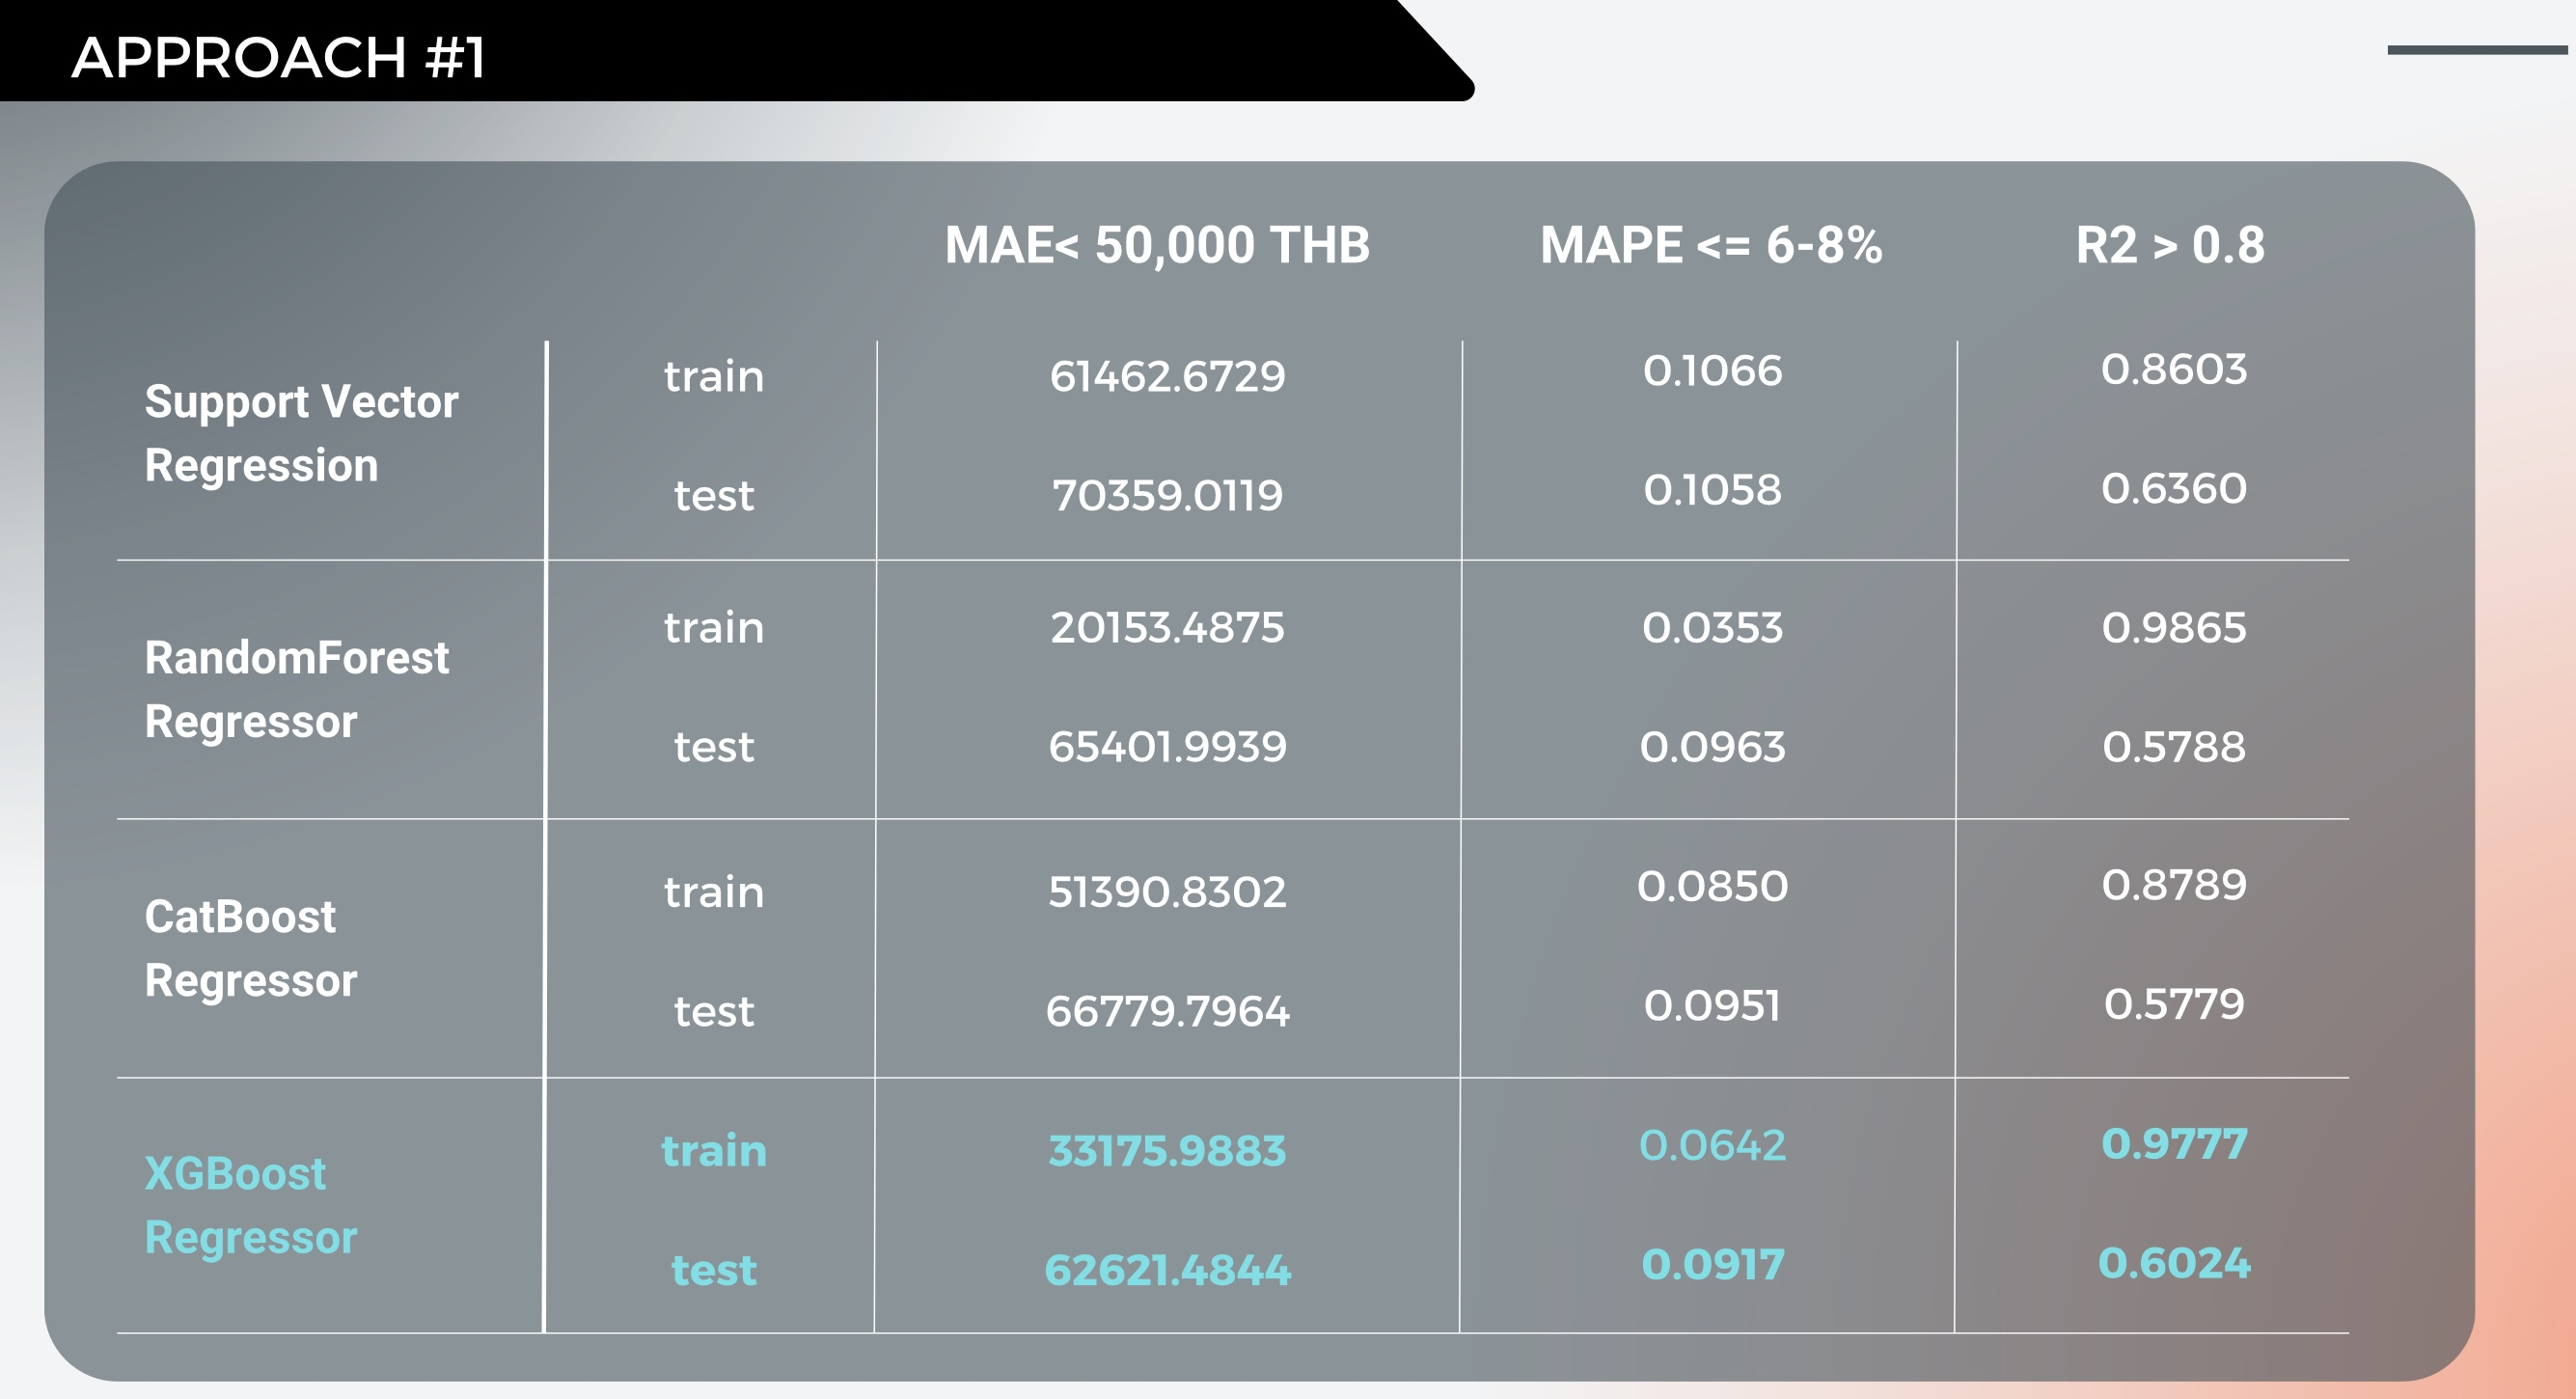

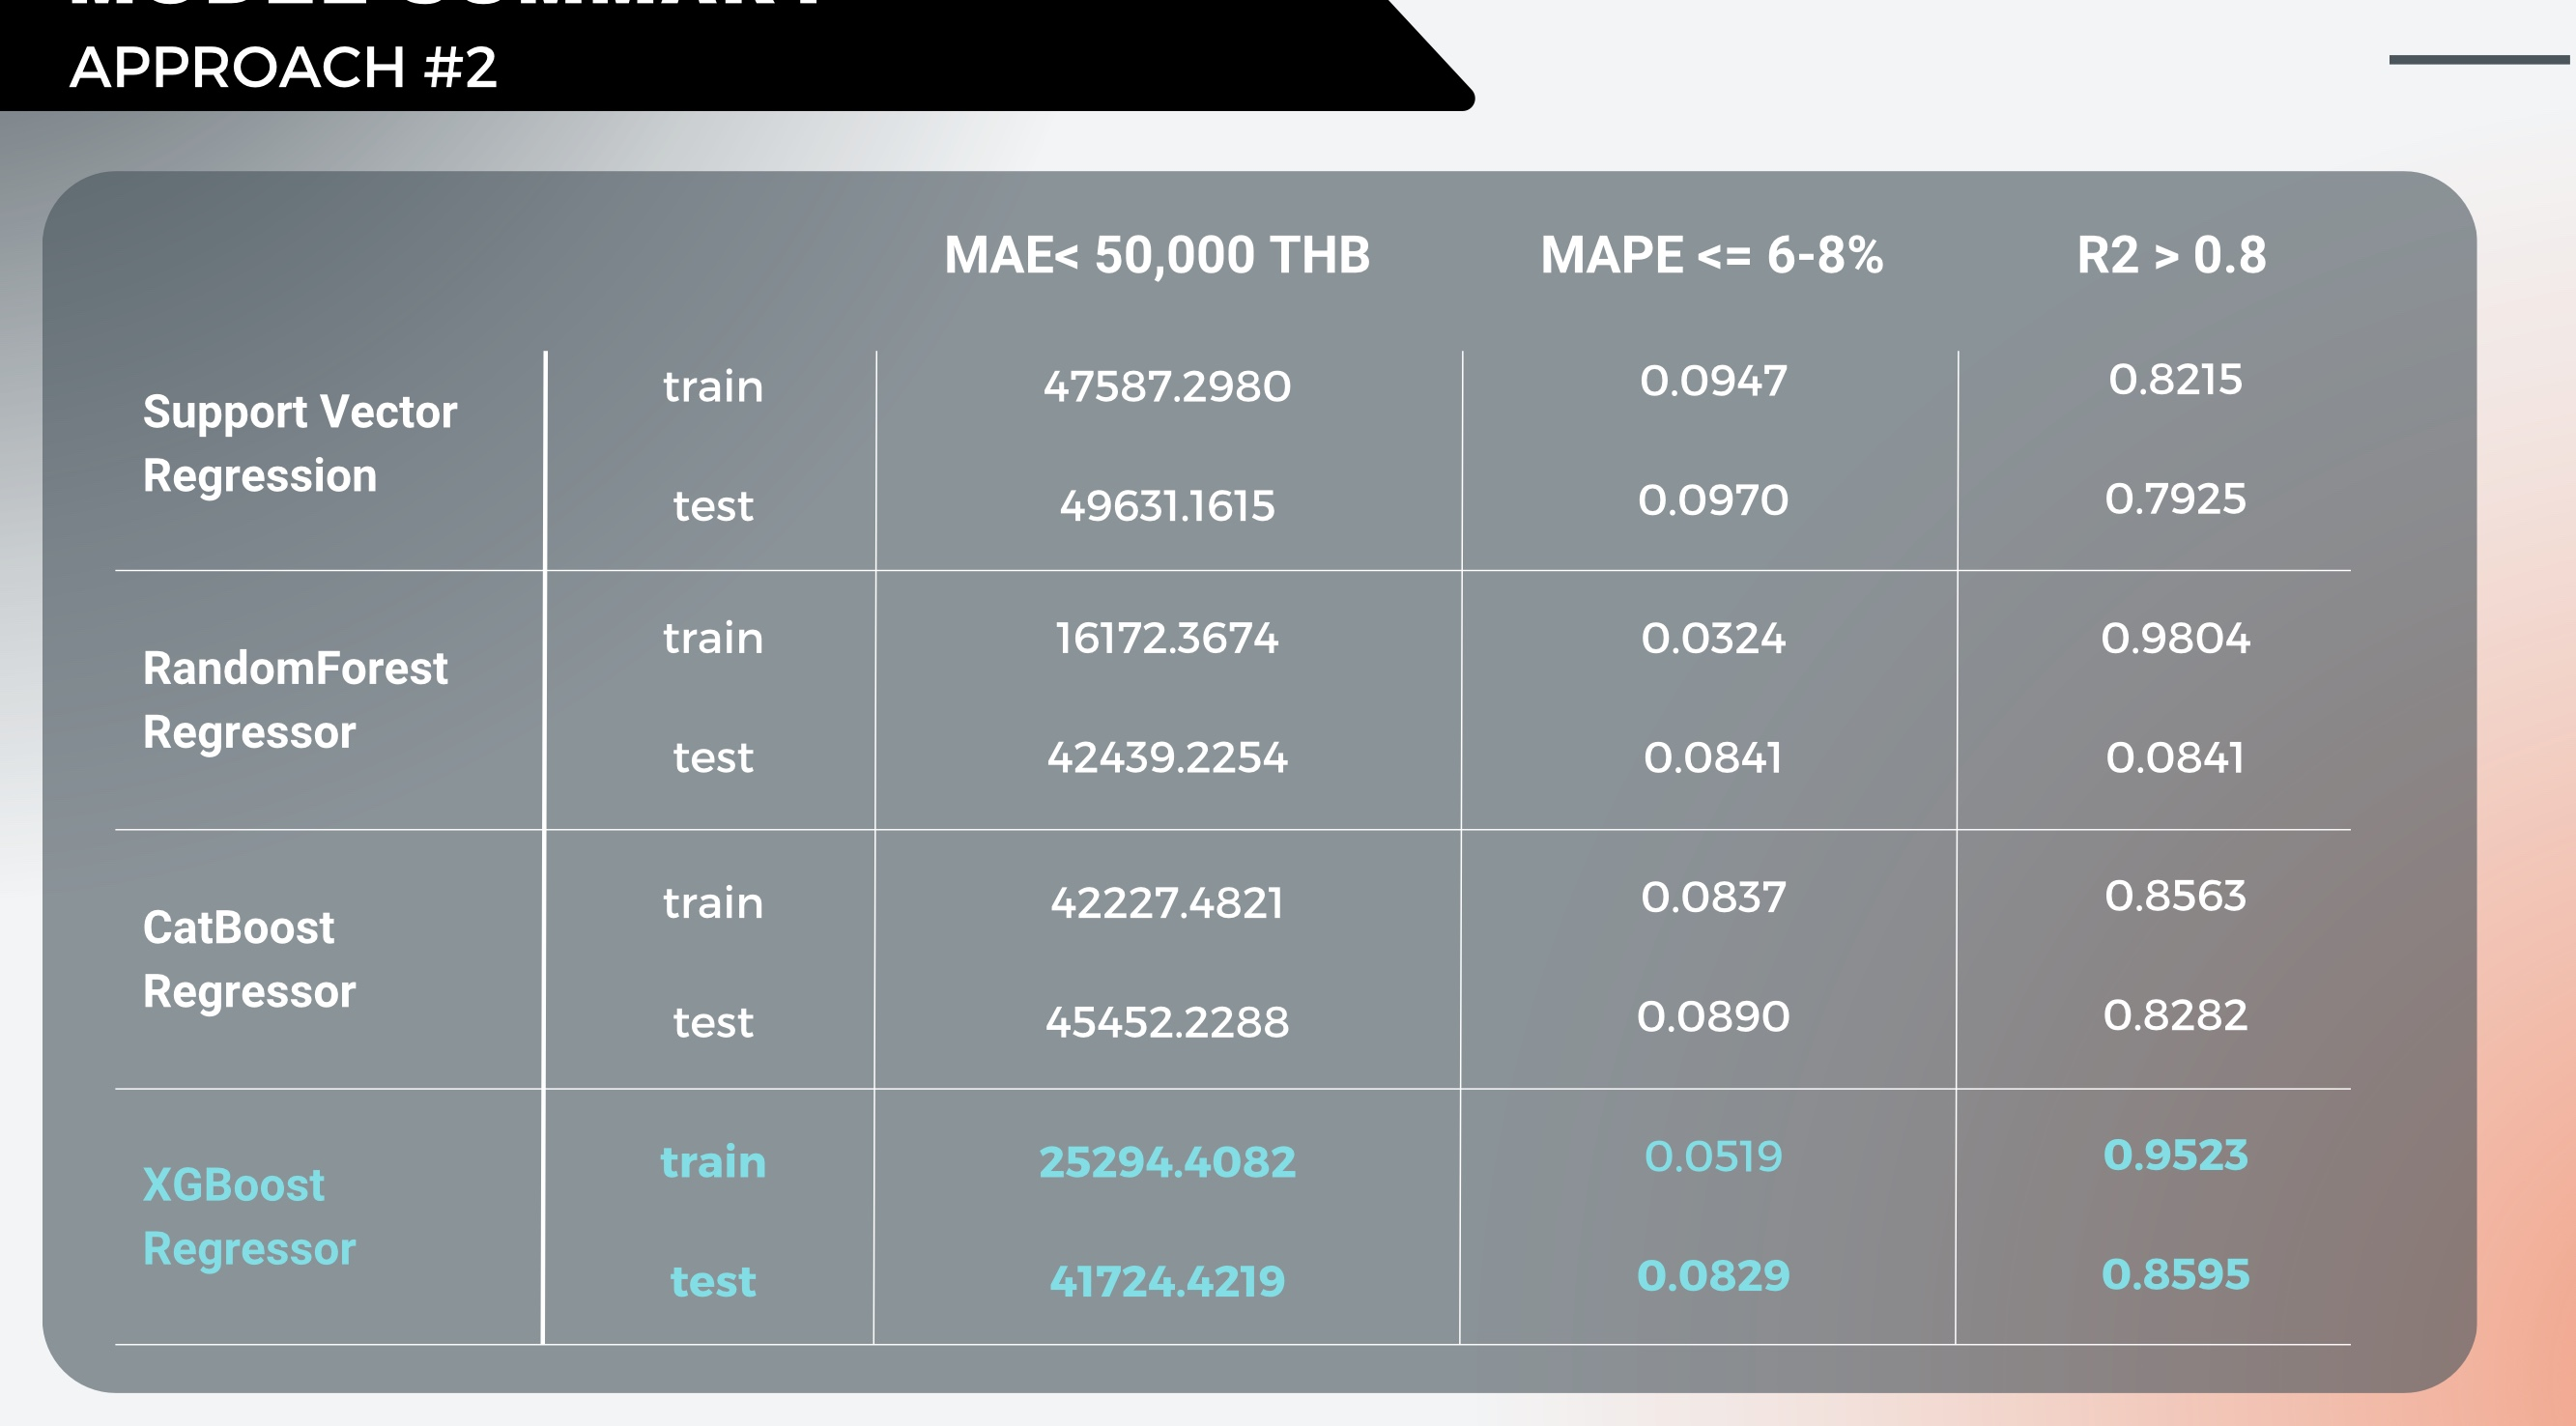

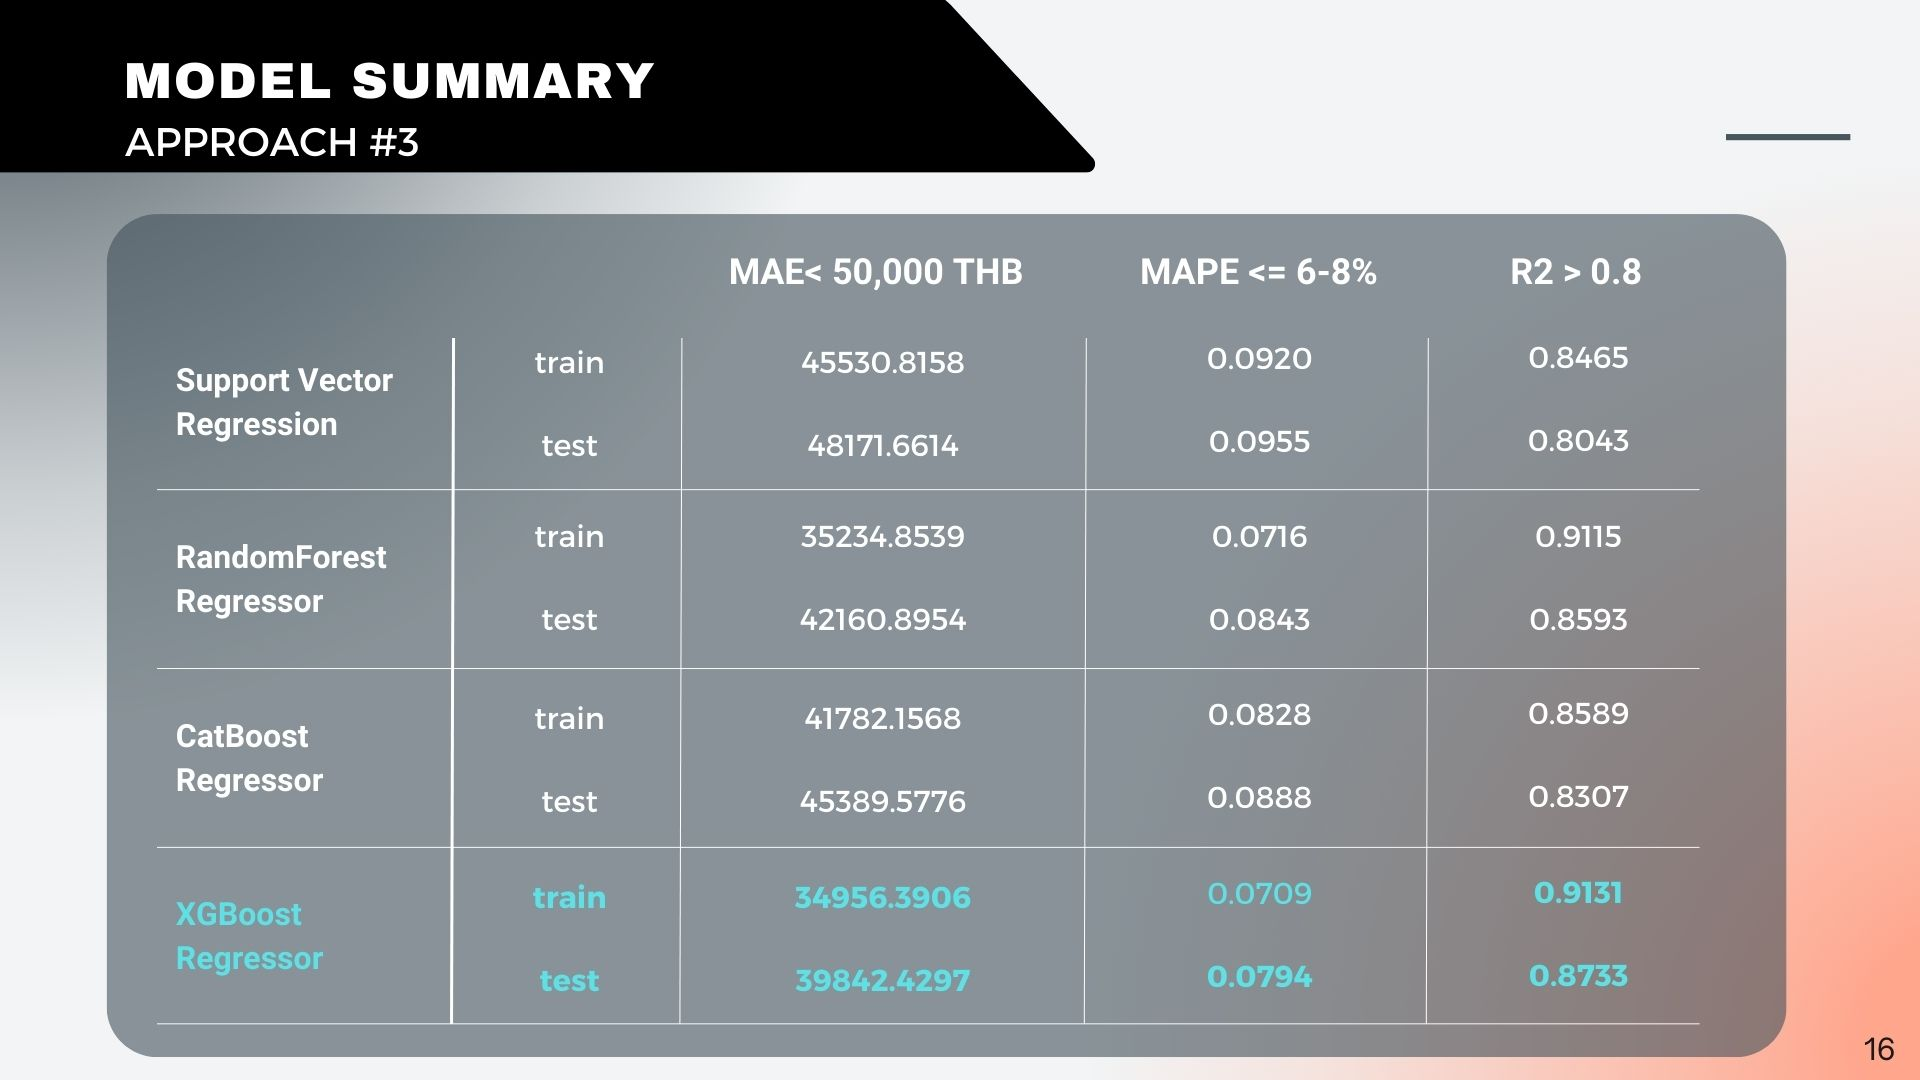

# Interpretation Summary by 3 Approaches (Based on Train and Test Set Performance)

* **Approach 1: Baseline Only**

> The model struggles to capture meaningful patterns due to limited input features. It underperforms and misses key relationships between variables, leading to poor generalization.

* **Approach 2: + Feature Engineering & Outlier Handling**

> The model becomes more expressive and captures important patterns. However, it learns too much from the training data and doesn’t generalize well to unseen data — a sign of overfitting.

* **Approach 3: + Regularization (Best Approach)**

> This approach provides the best balance. The model is accurate, meets predefined criteria, and generalizes well, avoiding overfitting. As a result, it delivers strong and reliable performance on new data.

***

# **Final Model Conclusion**


After comparing multiple models, the **XGBoost model with Approach 3 (Feature Engineering, Outlier Handling, and Regularization)** outperformed the other models in terms of MAPE and MAE. This approach effectively captured complex patterns in the data while minimizing overfitting.

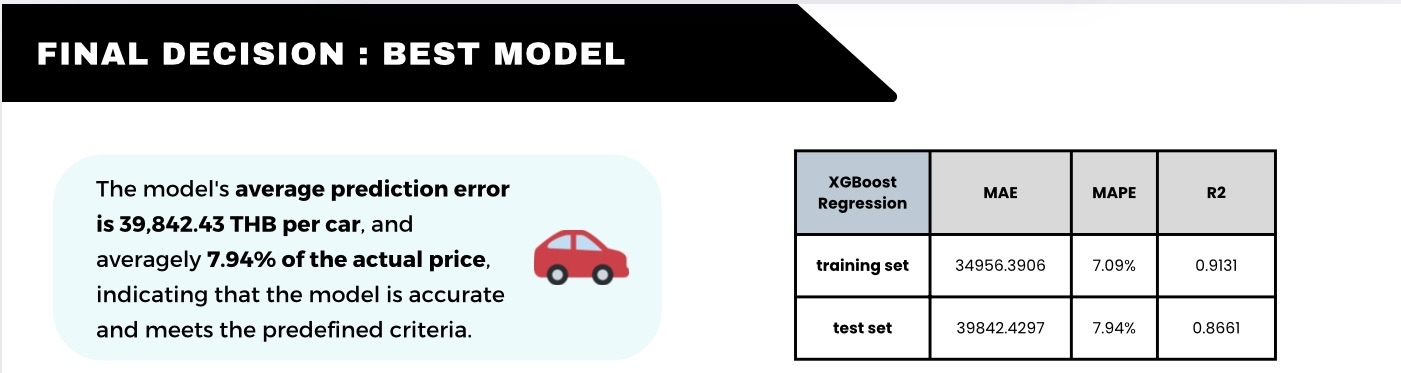

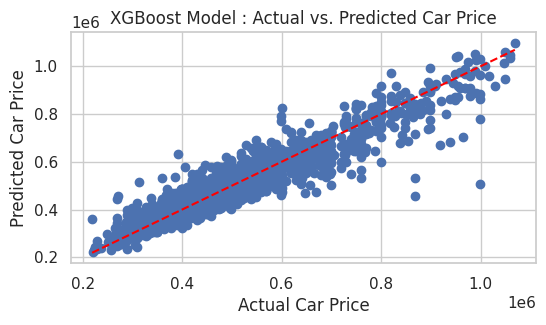

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Car Price")
plt.ylabel("Predicted Car Price")
plt.title("XGBoost Model : Actual vs. Predicted Car Price")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.show()

**Interpretation:**

> The scatter plot shows that the model performs well overall, with most predicted car prices closely aligning with the actual prices. However, there are a few instances where the predicted prices are slightly under-estimated (predicted < actual). These minor discrepancies suggest that while the model is generally accurate.



***

#  **Model Explainability : Feature Importance Analysis**


### Grouped Permutation Importance

When using one-hot encoding on features like carColor_, carBrand_, carSubSegment_, region_, and carType_

> traditional feature importance methods evaluate each dummy variable individually. This leads to an **incomplete view of how much a full categorical variable actually contributes.**

## To fix this,

> we apply **Grouped Permutation Importance** — merging related dummy variables into logical feature groups (e.g., carColor, carBrand, region) to better capture their total contribution.

## How Permutation Importance Works

Permutation Importance estimates feature impact by shuffling values and observing the performance drop:
> **Larger increase in MAPE ⇒ Higher feature importance**

This reveals how much the model relies on each feature (or feature group) for accurate predictions.


source: [Scikit-Learn : Permutation Feature Importance](https://scikit-learn.org/stable/modules/permutation_importance.html)


In [ ]:
pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 2.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from eli5.sklearn import PermutationImportance

# Custom scorer for MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Fit permutation importance
perm = PermutationImportance(best_xgb_regressor, scoring=mape_scorer, random_state=42)
perm.fit(X_test, y_test)

# Get importances and standard deviations
importances = perm.feature_importances_
stds = perm.feature_importances_std_
feature_names = X_test.columns.tolist()

# Map features to groups
group_map = {
    'carColor': [f for f in feature_names if f.startswith('carColor_')],
    'carBrand': [f for f in feature_names if f.startswith('carBrand_')],
    'carSubSegment': [f for f in feature_names if f.startswith('carSubSegment_')],
    'region': [f for f in feature_names if f.startswith('region_')],
    'carType': [f for f in feature_names if f.startswith('carType_')],
}

# Any remaining features are ungrouped (put as individual)
for f in feature_names:
    if not any(f in v for v in group_map.values()):
        group_map[f] = [f]

# Aggregate importance by group
group_results = []
for group, features in group_map.items():
    idxs = [feature_names.index(f) for f in features]
    group_importance = np.sum([importances[i] for i in idxs])
    group_std = np.sqrt(np.sum([stds[i]**2 for i in idxs]))
    group_results.append((group, group_importance, group_std))

# Display results as DataFrame
df_grouped = pd.DataFrame(group_results, columns=['Feature Group', 'Importance', 'Std Dev'])
df_grouped = df_grouped.sort_values(by='Importance', ascending=False)

print(df_grouped)

       Feature Group  Importance   Std Dev
12  carModel_encoded    0.166119  0.003898
2      carSubSegment    0.043766  0.001479
9             carAge    0.040582  0.001528
5              carCC    0.028746  0.000573
11         carGear_M    0.016659  0.001603
1           carBrand    0.016132  0.000455
7       numberOfSeat    0.010565  0.000654
6            mileage    0.006441  0.000353
0           carColor    0.001450  0.000337
8          isBangkok    0.001184  0.000133
10       Fuel_Diesel    0.000716  0.000177
3             region    0.000691  0.000223
4            carType    0.000165  0.000063


<ipython-input-60-380f96175b5b>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(


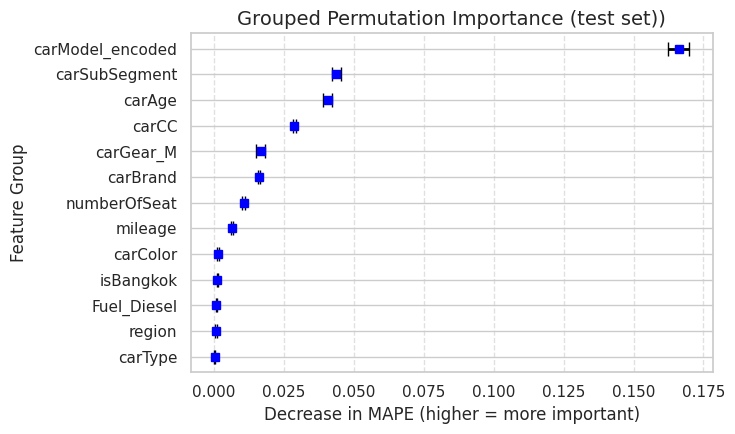

In [ ]:
import matplotlib.pyplot as plt

# Sort values so the most important is on top
df_grouped = df_grouped.sort_values(by='Importance', ascending=True)

# Plot with error bars
plt.figure(figsize=(7.5, 4.5))
plt.errorbar(
    df_grouped['Importance'],
    df_grouped['Feature Group'],
    xerr=df_grouped['Std Dev'],
    fmt='o',
    ecolor='black',
    color='blue',
    capsize=5,
    elinewidth=2,
    marker='s',
    markersize=6,
)

plt.title('Grouped Permutation Importance (test set))', fontsize=14)
plt.xlabel('Decrease in MAPE (higher = more important)')
plt.ylabel('Feature Group')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Interpretation:**

> Summary:

>* The most important features are **carModel_encoded, carSubSegment, and carAge**, all of which significantly affect car price predictions.

>* **CarBrand and carCC** also have a noticeable impact, but their contribution is less significant.

>* Features like **carColor, region, and carType** have a very minimal effect on the model’s predictions, indicating that they have a relatively low influence on determining car prices.

# **Further Recommendations for Enhancing Model Accuracy and Usability**

1. Limited Representation of Luxury Cars

> **Issue**: The website contains very few luxury car listings. Even when these cars have similar mileage or age compared to regular vehicles, their prices remain significantly higher.

>**Impact**: Including them may skew the model and reduce stability, especially when predicting prices for more common car types.

>**Recommendation**: Exclude luxury car data during training to improve overall model accuracy and stability for the majority of listings on the Roddonjai platform.

2. Suggestion: Add Vehicle Condition Information

>**Rationale**: If detailed car condition data—such as maintenance history, accident records, or water damage—is available, it would significantly enhance model precision.

>**Benefit**: More complete condition profiles would help the model generate fairer and more accurate price estimates, especially when cars have similar age and mileage but differ in wear or repair history.

# ***End of Project***

***
***